In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import datetime
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

In [3]:
df=pd.read_csv('Final/Jan_2019_ontime.csv')

In [4]:
df_set=df[['DAY_OF_MONTH','DAY_OF_WEEK','TAIL_NUM','ORIGIN','DEST','DEP_DEL15','DEP_TIME_BLK','ARR_DEL15','DISTANCE']]
df_set.columns=df_set.columns.str.lower()

## Exploratory Data Analysis

### Perbandingan Kejadian Delay

In [5]:
del15=df_set.groupby('dep_del15')['day_of_month'].count().reset_index()
del15.columns=['dep_delay','total']
del15['%']=round((del15['total']/len(df_set))*100,2)
del15

,dep_delay,total,%
0,0.0,468703,80.26
1,1.0,98927,16.94


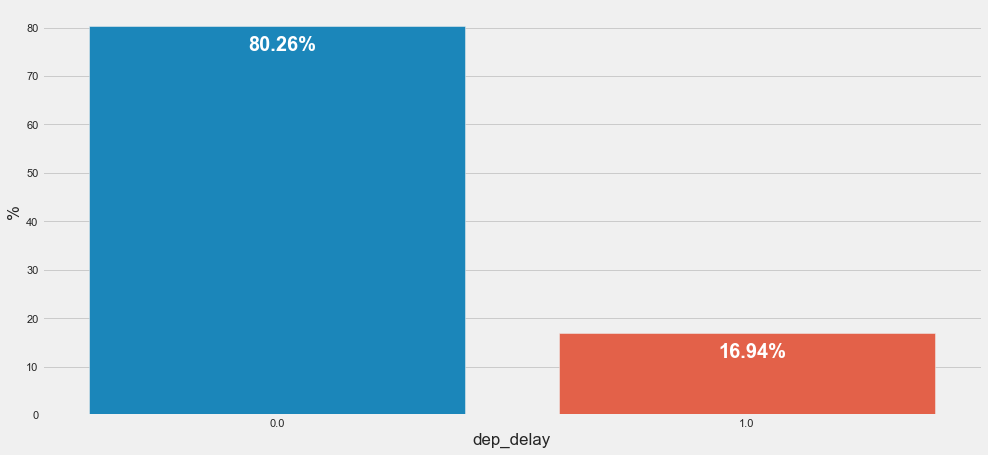

In [6]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='dep_delay', y='%', data=del15)

x = np.arange(len(del15['dep_delay']))
y = del15['%']

for i, v in enumerate(y):
    ax.text(x[i]-0.06, v-5, str(v)+'%', fontsize = 20, color='white', fontweight='bold')
    
plt.savefig('D:/Data Science/Perbandingan Jumlah Delay vs Not Delay.png')

##### Insight : Pada Januari 2019 jumlah kejadian delay sebesar 16.94% dari total penerbangan

#### 1. Bandara mana yang sering terjadi delay

In [8]:
or19 = df_set.groupby('origin')['dep_del15'].sum().sort_values(ascending=False).reset_index().head(10)
or19

,origin,dep_del15
0,ORD,6620.0
1,ATL,4133.0
2,DFW,4044.0
3,LGA,3791.0
4,DEN,3438.0
5,LAX,3047.0
6,SFO,2977.0
7,CLT,2689.0
8,EWR,2544.0
9,BOS,2440.0


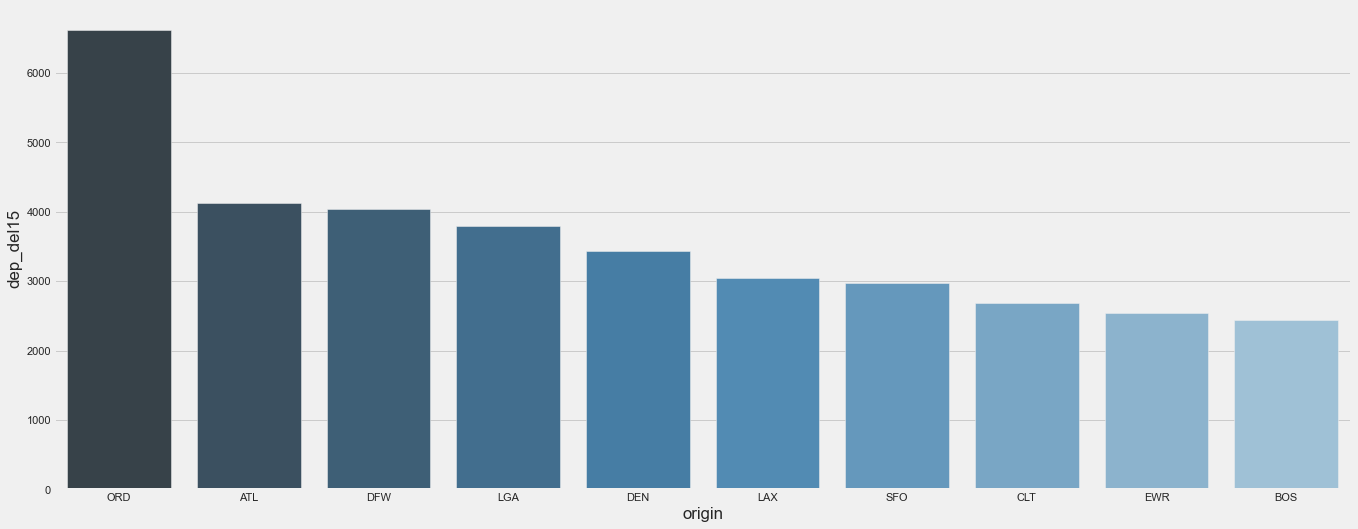

In [9]:
#sns.barplot(x='origin', y='dep_del15', data=or19, color='lightblue')
sns.barplot(x='origin', y='dep_del15', data=or19, palette="Blues_d")
plt.savefig('D:/Data Science/Bandara Delay Terbanyak.png')

# sns.barplot(x='origin', y='dep_del15', data=or19, palette="Blues_d") (gradasi )

##### Pada Tahun 2019, Bandara yang sering mengalami delay yaitu bandara ORD (Chicago O'Hare International)

#### 2. Hari apa yang sering terjadi delay

In [9]:
tp=df_set.groupby(['day_of_week','dep_del15'])['tail_num'].count().reset_index()
tp.columns=['day_of_week', 'dep_del15', 'total_flight']
tp

,day_of_week,dep_del15,total_flight
0,1,0.0,63440
1,1,1.0,13600
2,2,0.0,75638
3,2,1.0,14358
4,3,0.0,76734
5,3,1.0,16860
6,4,0.0,77618
7,4,1.0,19111
8,5,0.0,65271
9,5,1.0,13565


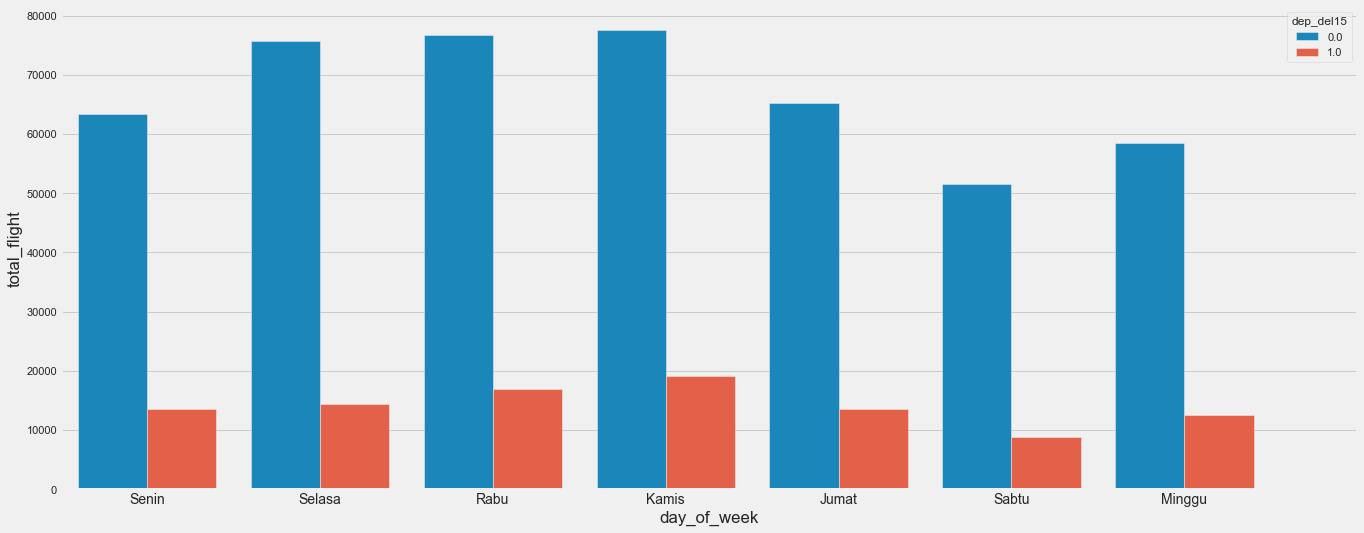

In [10]:
sns.barplot(x='day_of_week', y='total_flight', hue='dep_del15', data=tp)
plt.xticks(np.arange(8), ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'], fontsize=14)
plt.savefig('D:/Data Science/Kejadian delay per hari.png')

##### Pada hari Kamis pada bulan Januari 2019 sering terjadi delay

#### 3. Pada Tanggal Berapa terjadi lonjakan delay paling tinggi

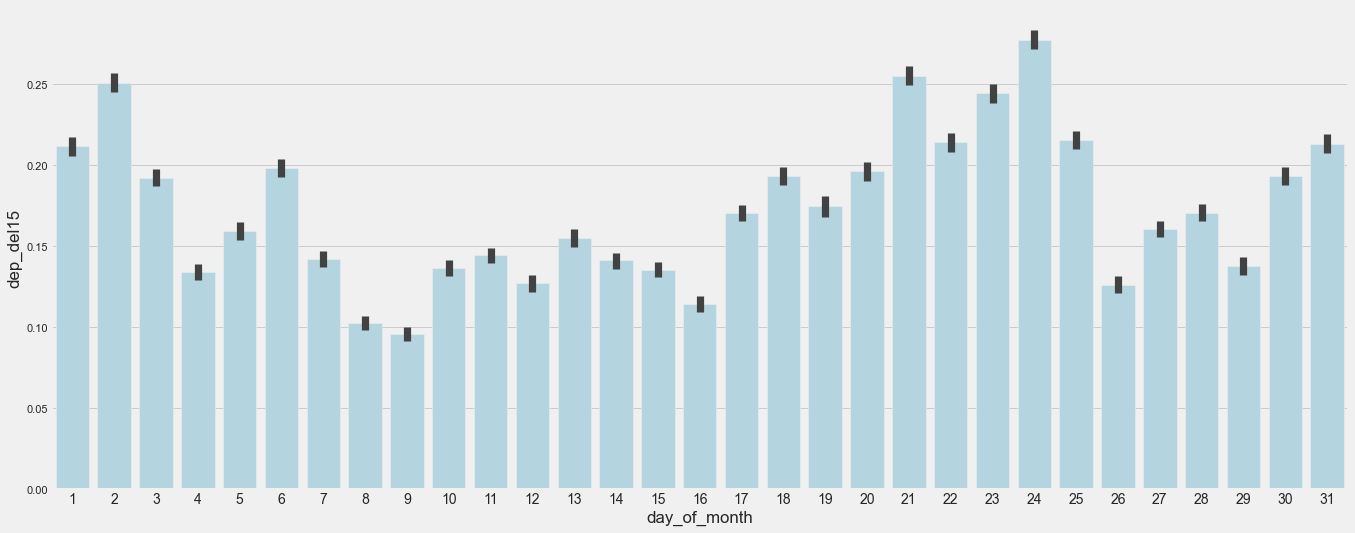

In [11]:
sns.barplot(x=df_set.day_of_month, y=df_set.dep_del15, color='lightblue')
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Kejadian delay per tanggal.png')

##### Pada Tanggal 24 bulan Januari 2019 terjadi lonjakan delay paling tinggi

#### 4. Pesawat apa yang sering mengalami delay

In [12]:
tail19 = df_set.groupby('tail_num')['dep_del15'].sum().sort_values(ascending=False).reset_index().head(5)
tail19

,tail_num,dep_del15
0,N954SW,70.0
1,N758EV,67.0
2,N818MD,61.0
3,N679SA,61.0
4,N776SK,59.0


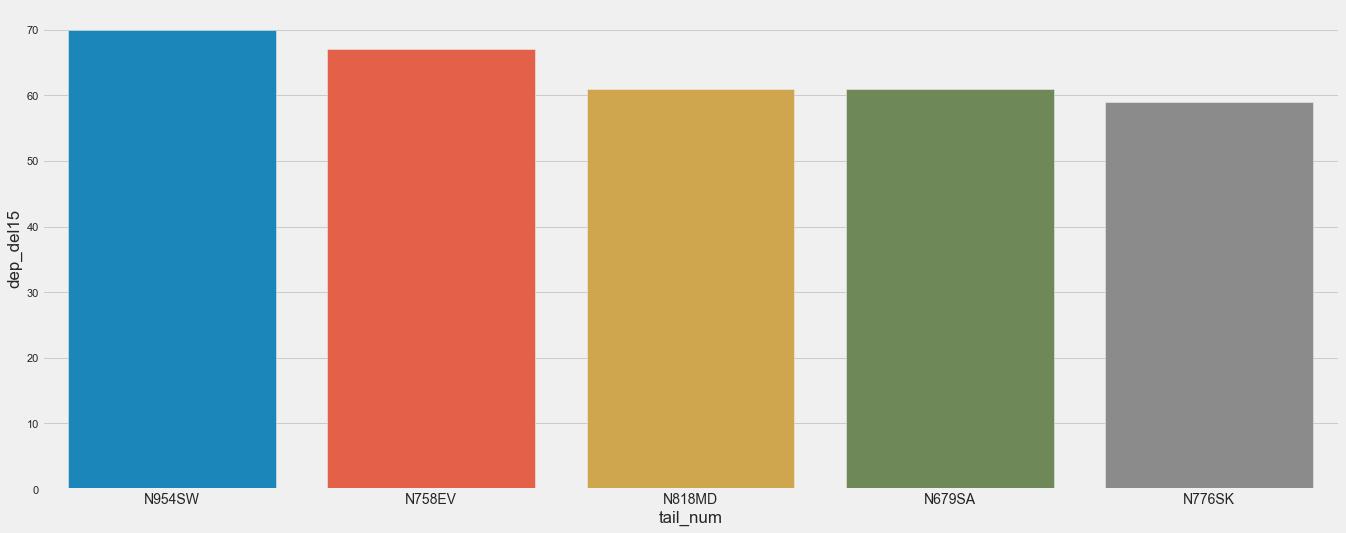

In [13]:
sns.barplot(x='tail_num', y='dep_del15', data=tail19)
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Pesawat sering delay.png')

##### Pesawat N954SW mengalami delay paling tinggi di bulan Januari 2019

#### 5. Waktu keberangkatan yang sering mengalami delay

In [14]:
tb19_head = df_set.groupby('dep_time_blk')['dep_del15'].sum().sort_values(ascending=False).reset_index().head(5)
tb19_head

,dep_time_blk,dep_del15
0,1700-1759,8194.0
1,1800-1859,7929.0
2,1900-1959,7615.0
3,1600-1659,7380.0
4,1400-1459,7324.0


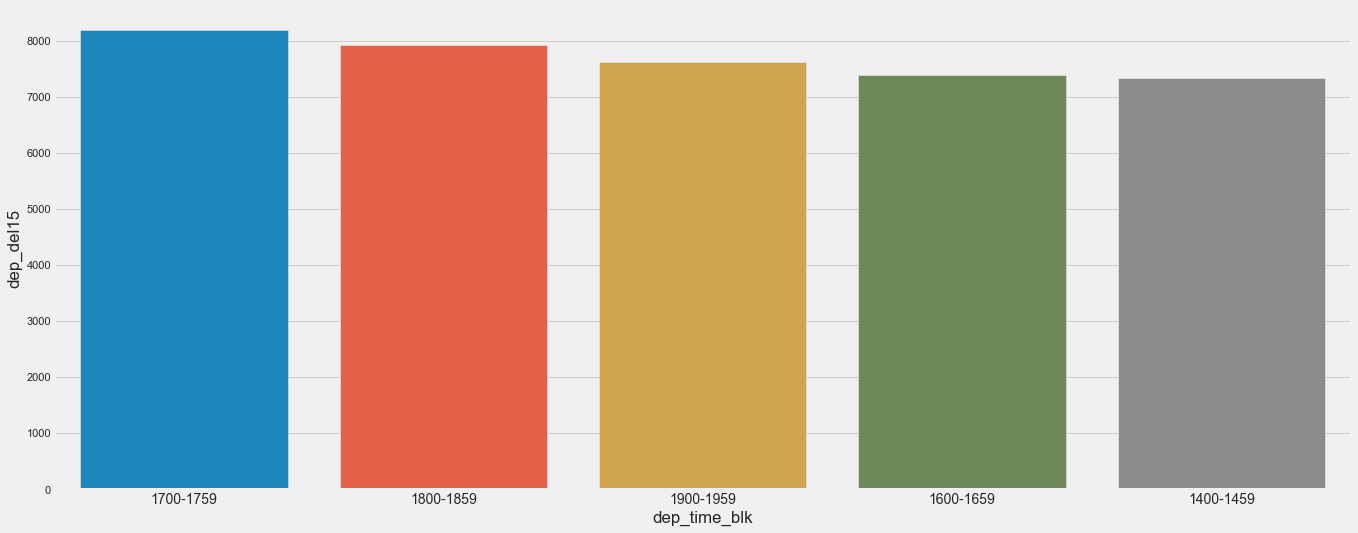

In [15]:
sns.barplot(x='dep_time_blk', y='dep_del15', data=tb19_head)
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Time block sering delay.png')

##### Pada bulan Januari 2019 kejadian departure delay sering terjadi pada pukul 17.00 - 17.59

In [16]:
tb19_tail = df_set.groupby('dep_time_blk')['dep_del15'].sum().sort_values(ascending=False).reset_index().tail(5)
tb19_tail = tb19_tail.sort_values(['dep_del15'], ascending=False)
tb19_tail

,dep_time_blk,dep_del15
14,0700-0759,3398.0
15,0600-0659,2840.0
16,2200-2259,2348.0
17,0001-0559,1301.0
18,2300-2359,614.0


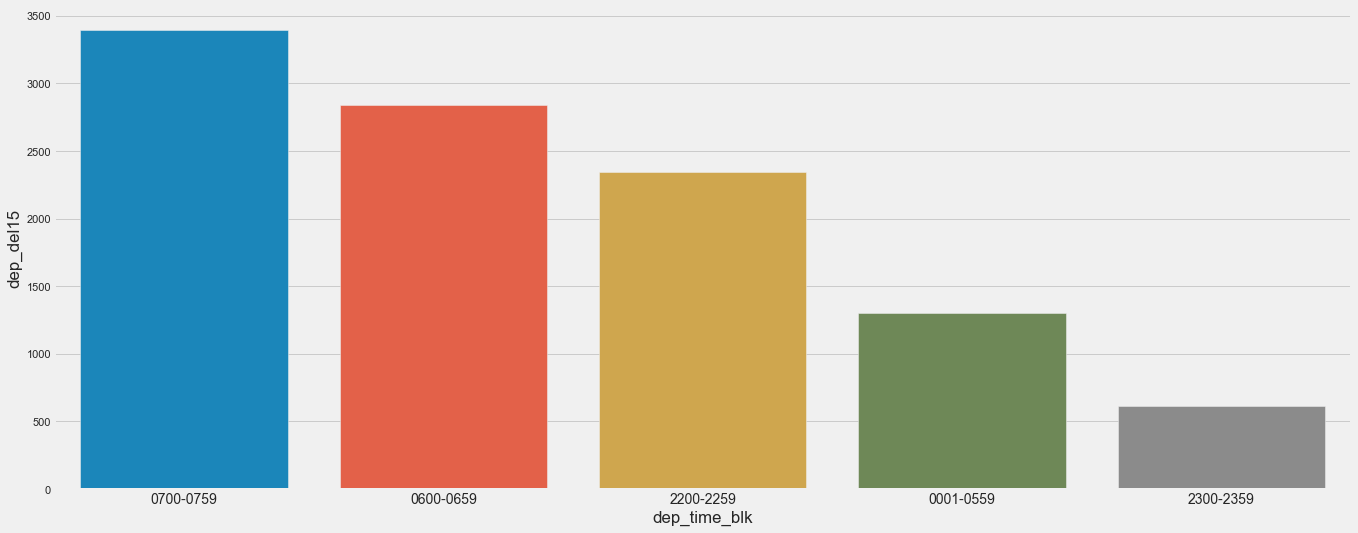

In [17]:
sns.barplot(x='dep_time_blk', y='dep_del15', data=tb19_tail)
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Time block sedikit delay.png')

#### 6. Waktu Keberangkatan Terpadat dan tersepi

In [18]:
tb19_density_head= df_set.groupby('dep_time_blk')['tail_num'].count().sort_values(ascending=False).reset_index().head(5)
tb19_density_head.columns=['dep_time_blk','total_flight']
tb19_density_head

,dep_time_blk,total_flight
0,0600-0659,41618
1,0800-0859,38786
2,0700-0759,38183
3,1700-1759,37128
4,1200-1259,36801


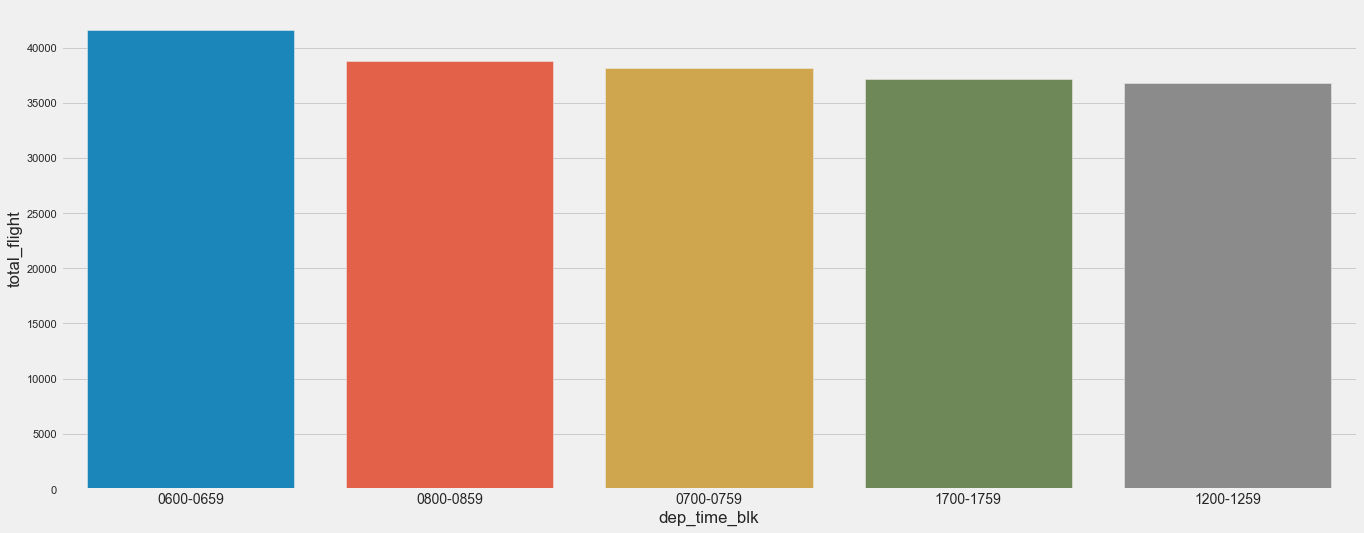

In [19]:
sns.barplot(x='dep_time_blk', y='total_flight', data=tb19_density_head)
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Time block penerbangan terpadat.png')

In [20]:
tb19_density_tail = df_set.groupby('dep_time_blk')['tail_num'].count().sort_values(ascending=False).reset_index().tail(5)
tb19_density_tail.columns=['dep_time_blk','total_flight']
tb19_density_tail

,dep_time_blk,total_flight
14,2000-2059,25991
15,2100-2159,17762
16,0001-0559,15746
17,2200-2259,12988
18,2300-2359,3564


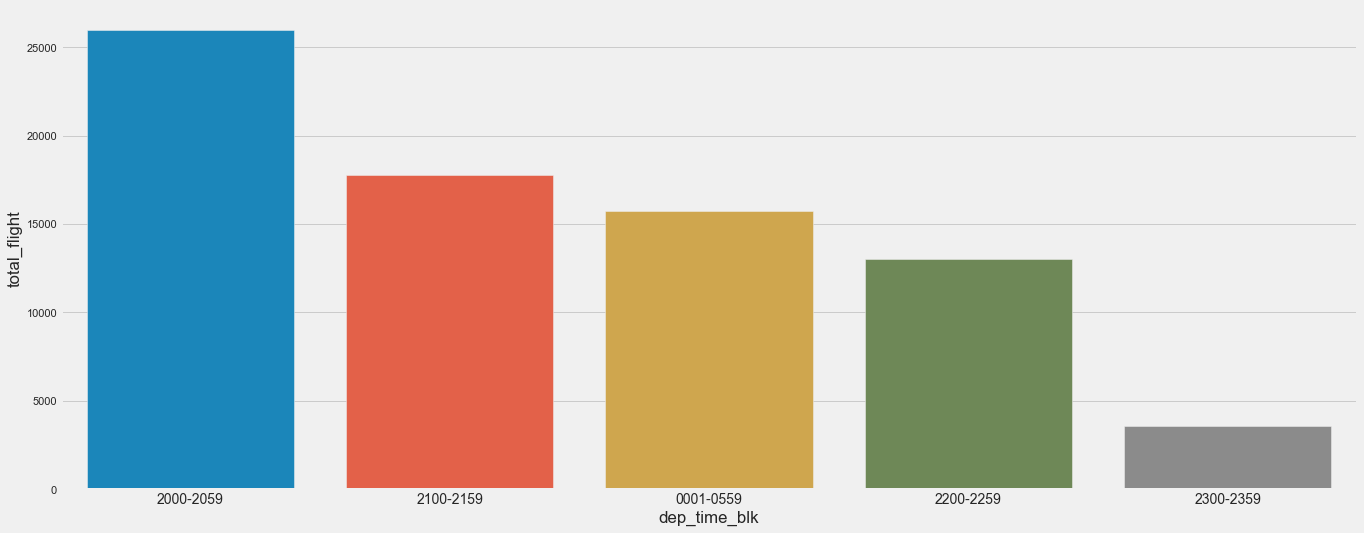

In [21]:
sns.barplot(x='dep_time_blk', y='total_flight', data=tb19_density_tail)
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Time block penerbangan tersepi.png')

#### 7. Perbandingan kejadian arrival delay

In [22]:
ar19 = df_set.groupby(['arr_del15','dep_del15'])['tail_num'].count().sort_values(ascending=True).reset_index()
ar19.columns=['arr_del','dep_del','total_flight']
ar19['%']=round((ar19['total_flight']/len(df_set))*100,2)
ar19

,arr_del,dep_del,total_flight,%
0,0.0,1.0,20017,3.43
1,1.0,0.0,26934,4.61
2,1.0,1.0,78288,13.41
3,0.0,0.0,440724,75.47


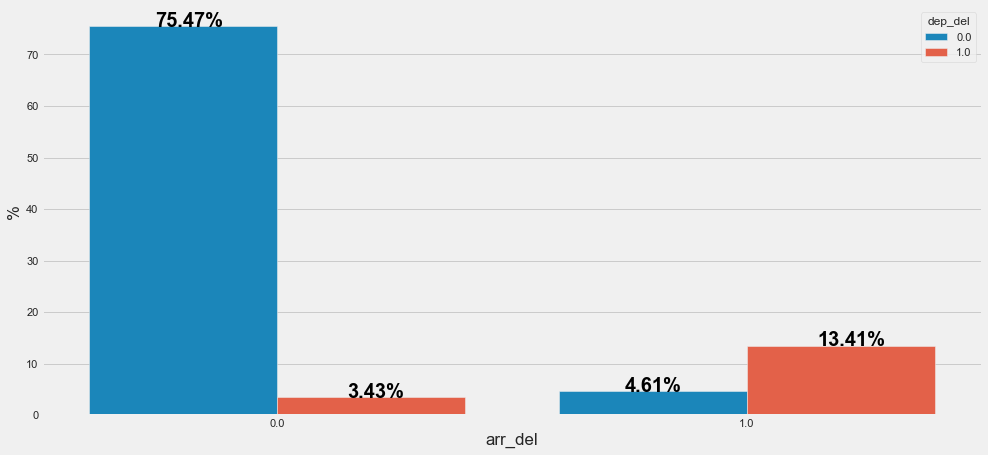

In [23]:
fig, ax = plt.subplots(figsize=(15,7))
sns.barplot(x='arr_del', y='%', hue='dep_del', data=ar19)

x = ar19['arr_del']
y = ar19['%']

for i, v in enumerate(y):
    if i % 2 == 0:
        ax.text(x[i]+0.15, v, str(v)+'%', fontsize = 20, color='black', fontweight='bold')
    else:
        ax.text(x[i]-0.26, v, str(v)+'%', fontsize = 20, color='black', fontweight='bold')

plt.savefig('D:/Data Science/Arrival delay disebabkan departure delay.png')

##### Pada Januari 2019 banyaknya kejadian arrival delay yang diawali dengan kejadian departure delay lebih banyak dibandingkan yang tepat waktu

#### 8. Jarak tempuh pesawat yang sering mengalami delay

In [24]:
disc19 = df_set.groupby('distance')['dep_del15'].sum().sort_values(ascending=False).reset_index().head(10)
disc19

,distance,dep_del15
0,337.0,882.0
1,733.0,864.0
2,296.0,597.0
3,184.0,554.0
4,214.0,472.0
5,447.0,419.0
6,335.0,418.0
7,937.0,412.0
8,888.0,408.0
9,612.0,396.0


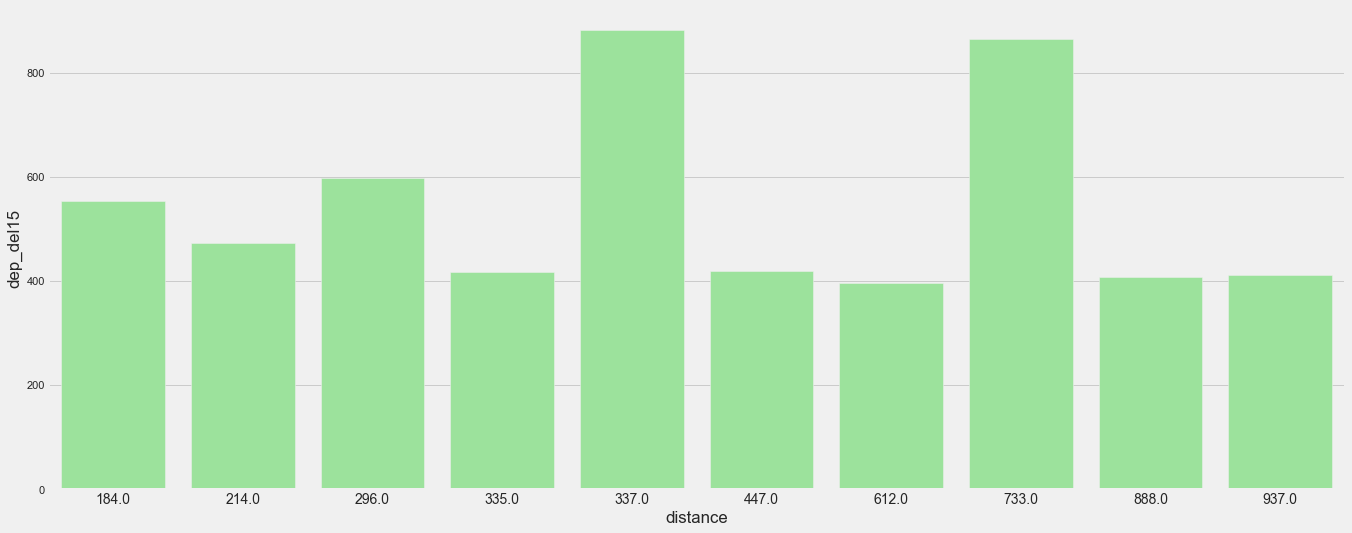

In [25]:
sns.barplot(x='distance', y='dep_del15', data=disc19, color='lightgreen')
plt.xticks(fontsize=14)
plt.savefig('D:/Data Science/Jarak terbang rentan terjadi delay.png')

##### Terjadi keterlambatan keberangkatan pesawat di Januari 2019 di domininasi pada jarak tempuh 337 km

# Data Pre-processing

### DATA CLEANSING

In [26]:
def missing_value(df):
    mv=df.isnull().sum().reset_index()
    mv.columns=['feature','total_missing_value']
    mv['%']=round(mv['total_missing_value']/len(df)*100,2)
    mv=mv[mv['%']>0].sort_values('%',ascending=False).reset_index(drop=True)
    fitur=mv['feature']
    return mv
mv=missing_value(df_set)
mv

,feature,total_missing_value,%
0,arr_del15,18022,3.09
1,dep_del15,16355,2.80
2,tail_num,2543,0.44


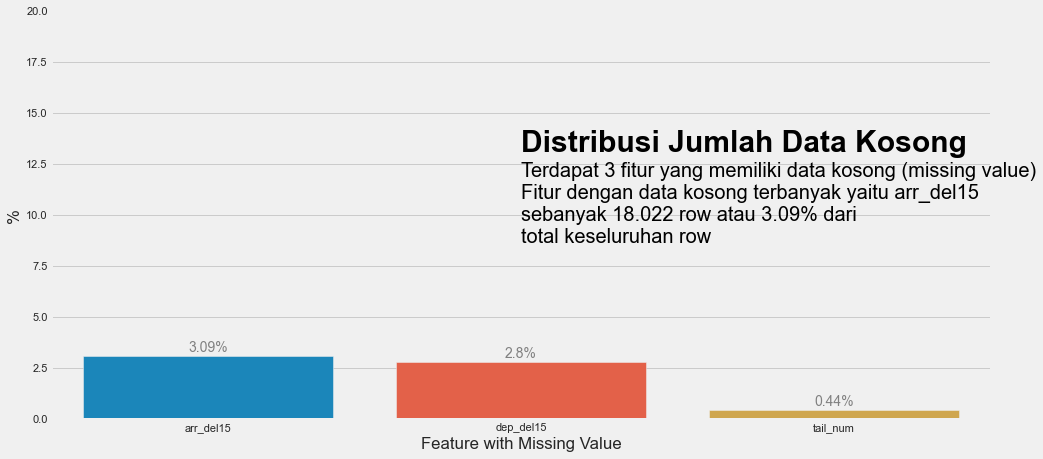

In [27]:
fig, ax=plt.subplots(figsize=(15,7))

sns.barplot(x='feature', y='%', data=mv).set_ylim(0,20)

x = np.arange(len(mv['feature']))
y = mv['%']

for i, k in enumerate(y):
    ax.text(x[i],k+0.2,str(k)+'%',horizontalalignment='center',color='gray')

title ='''
Distribusi Jumlah Data Kosong
'''
text = '''
Terdapat 3 fitur yang memiliki data kosong (missing value)
Fitur dengan data kosong terbanyak yaitu arr_del15 
sebanyak 18.022 row atau 3.09% dari 
total keseluruhan row

'''
    
ax.text(1,11.5,title,horizontalalignment='left',color='black',fontsize=30,fontweight='bold')
ax.text(1,6.5,text,horizontalalignment='left',color='black',fontsize=20)
ax.set_xlabel('Feature with Missing Value')
plt.savefig('D:/Data Science/Distribution nilai yang hilang.png')

In [28]:
fitur=mv['feature'].tolist()
for i in range(0,len(fitur)):
    df_set=df_set.dropna(subset=[fitur[i]])
mv=missing_value(df_set)
mv
# print(len(df_set))

,feature,total_missing_value,%


In [29]:
df_set['dep_time_blk'].unique()

array(['0600-0659', '1400-1459', '1200-1259', '1500-1559', '1900-1959',
       '0900-0959', '1000-1059', '2000-2059', '1300-1359', '1100-1159',
       '0800-0859', '2200-2259', '1600-1659', '1700-1759', '2100-2159',
       '0700-0759', '1800-1859', '0001-0559', '2300-2359'], dtype=object)

In [30]:
df_set['dep_time']=(pd.to_numeric(df_set['dep_time_blk'].str.split(pat='-',expand=True)[0])/100).astype(int)
df_set=df_set.sort_values(['day_of_month','day_of_week','tail_num','dep_time'], ascending=True).reset_index(drop=True)
df_set

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14
...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10


In [31]:
# menambahkan fitur previous arrival delay (terlambat tiba/datang, pada penerbangan sebelumnya)

tn0=''
ad0=0
dom0=0
tn1=''
ad1=0
dom1=0
s=[]
for i, k in df_set.iterrows():
    tn1=k['tail_num']
    ad1=k['arr_del15']
    dom1=k['day_of_month']
    if (tn1 == tn0) and (dom0 == dom1):
        if ad0 !=0:
            temp=1
            s.append(temp)
        else: 
            temp=0
            s.append(temp)     
    else:
        temp=0
        s.append(temp)
        
    tn0=tn1
    ad0=ad1
    dom0=dom1
df_set['prev_arr_del']=s
df_set

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,prev_arr_del
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,0
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10,1
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8,0
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11,0
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14,0
...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,0
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,0
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,0
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,0


In [32]:
# menambahkan fitur total keterlambatan tiba dalam 1 hari per tail_number

tn0=''
ad0=0
dom0=0
pad0=0
tn1=''
ad1=0
dom1=0
pad1=0
s=[]
for i, k in df_set.iterrows():
    tn1=k['tail_num']
    ad1=k['arr_del15']
    dom1=k['day_of_month']
    pad1=k['prev_arr_del']
    if (tn1 == tn0) and (dom0 == dom1):
        temp=temp+ad0
        s.append(temp)     
    else:
        temp=0
        s.append(temp)
    tn0=tn1
    ad0=ad1
    dom0=dom1
    pad0=pad1
df_set['total_arr_del_per_day']=s
df_set

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,0,0.0
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10,1,1.0
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8,0,0.0
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11,0,0.0
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,0,0.0
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,0,0.0
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,0,0.0
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,0,0.0


In [33]:
df_set.loc[df_set['total_arr_del_per_day']==9]
df_set.iloc[103870:103880]

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day
103870,6,7,N712SK,PSP,PHX,0.0,0600-0659,1.0,261.0,6,0,0.0
103871,6,7,N712SK,PHX,FLG,0.0,0900-0959,1.0,119.0,9,1,1.0
103872,6,7,N712SK,FLG,PHX,1.0,1100-1159,1.0,119.0,11,1,2.0
103873,6,7,N712SK,PHX,TUS,1.0,1300-1359,1.0,110.0,13,1,3.0
103874,6,7,N712SK,TUS,PHX,1.0,1400-1459,1.0,110.0,14,1,4.0
103875,6,7,N712SK,PHX,TUS,1.0,1600-1659,1.0,110.0,16,1,5.0
103876,6,7,N712SK,TUS,PHX,1.0,1700-1759,1.0,110.0,17,1,6.0
103877,6,7,N712SK,PHX,YUM,1.0,1900-1959,1.0,160.0,19,1,7.0
103878,6,7,N712SK,YUM,PHX,1.0,2100-2159,1.0,160.0,21,1,8.0
103879,6,7,N712SK,PHX,YUM,1.0,2200-2259,1.0,160.0,22,1,9.0


In [34]:
# menambahkan fitur total keterlambatan berangkat dalam 1 hari per tail_number

tn0=''
dd0=0
dom0=0
pad0=0
tn1=''
dd1=0
dom1=0
pad1=0
s=[]
for i, k in df_set.iterrows():
    tn1=k['tail_num']
    dd1=k['dep_del15']
    dom1=k['day_of_month']
    pad1=k['prev_arr_del']
    if (tn1 == tn0) and (dom0 == dom1):
        temp=temp+dd0
        s.append(temp)     
    else:
        temp=0
        s.append(temp)
    tn0=tn1
    dd0=dd1
    dom0=dom1
    pad0=pad1
df_set['total_dep_del_per_day']=s
df_set

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day,total_dep_del_per_day
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,0,0.0,0.0
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10,1,1.0,0.0
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8,0,0.0,0.0
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11,0,0.0,0.0
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,0,0.0,0.0
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,0,0.0,0.0
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,0,0.0,0.0
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,0,0.0,0.0


In [35]:
import dataframe_image as dfi
#new_fiture=df_set.loc[df_set['total_dep_del_per_day']==8]

new_fiture=df_set.iloc[104406:104415]
new_fiture
new_fiture.dfi.export('D:/Data Science/new_fiture.png')

In [36]:
dc=pd.read_excel('data_cuaca.xlsx')
dc.info()
dc.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    0 non-null      float64
 1   time          744 non-null    int64  
 2   day_of_month  744 non-null    object 
 3   temp_max      744 non-null    float64
 4   temp_min      744 non-null    float64
 5   temp_ave      744 non-null    float64
 6   wind_dir      744 non-null    object 
 7   wind_speed    744 non-null    float64
 8   wind_gust     744 non-null    float64
 9   prec_level    744 non-null    float64
 10  total_cloud   744 non-null    float64
 11  visibility    744 non-null    float64
 12  snow_depth    744 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 75.7+ KB


,Unnamed: 0,time,day_of_month,temp_max,temp_min,temp_ave,wind_dir,wind_speed,wind_gust,prec_level,total_cloud,visibility,snow_depth
0,NaN,0,2019-01-01 00:00:00,-6.7,-13.8,-10.2,WSW,7.2,48.4,3.0,6.3,0.2,7.0
1,NaN,1,2019-01-01 00:00:00,-6.7,-13.8,-10.2,WSW,7.1,48.4,3.0,6.3,0.2,7.0
2,NaN,2,2019-01-01 00:00:00,-6.7,-13.8,-10.2,WSW,7.0,48.4,3.0,6.3,0.2,7.0
3,NaN,3,2019-01-01 00:00:00,-6.7,-13.8,-10.2,WSW,7.1,48.4,3.0,6.3,12.6,7.0
4,NaN,4,2019-01-01 00:00:00,-6.7,-13.8,-10.2,WSW,7.2,48.4,3.0,6.3,12.6,7.0


In [37]:
dc['day_of_month']=pd.to_datetime(dc['day_of_month'])
dc['day_of_month']=dc['day_of_month'].dt.day
dc=dc.drop(['temp_max','temp_min','wind_gust'], axis=1)
dc = dc.loc[:, ~dc.columns.str.contains('^Unnamed')]
dc.head()

,time,day_of_month,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,0,1,-10.2,WSW,7.2,3.0,6.3,0.2,7.0
1,1,1,-10.2,WSW,7.1,3.0,6.3,0.2,7.0
2,2,1,-10.2,WSW,7.0,3.0,6.3,0.2,7.0
3,3,1,-10.2,WSW,7.1,3.0,6.3,12.6,7.0
4,4,1,-10.2,WSW,7.2,3.0,6.3,12.6,7.0


In [38]:
dc.head().dfi.export('D:/Data Science/data_cuaca.png')

In [39]:
dc.isnull().sum()

time            0
day_of_month    0
temp_ave        0
wind_dir        0
wind_speed      0
prec_level      0
total_cloud     0
visibility      0
snow_depth      0
dtype: int64

In [40]:
dl = df_set.merge(dc, left_on=['day_of_month','dep_time'], right_on=['day_of_month','time'], how='left')
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,...,total_arr_del_per_day,total_dep_del_per_day,time,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
1,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,1.6,NW,5.8,1.5,5.4,14.4,20.7
2,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,1.3,WSW,3.5,2.7,4.9,13.9,17.2
3,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,2.8,WSW,5.0,3.6,3.9,14.2,17.5
4,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.8,SW,5.4,3.5,3.1,14.2,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762242,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,...,0.0,0.0,17.0,-5.2,WSW,4.3,0.6,3.0,14.6,20.3
762243,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,...,0.0,0.0,20.0,-4.6,WSW,3.4,0.7,3.0,14.7,21.5
762244,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,...,0.0,0.0,6.0,-4.8,W,5.2,0.6,3.1,14.5,19.6
762245,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,...,0.0,0.0,10.0,-4.9,W,5.1,0.6,3.1,14.5,19.6


In [41]:
mv=missing_value(dl)
mv

,feature,total_missing_value,%
0,time,206718,27.12
1,temp_ave,206718,27.12
2,wind_dir,206718,27.12
3,wind_speed,206718,27.12
4,prec_level,206718,27.12
5,total_cloud,206718,27.12
6,visibility,206718,27.12
7,snow_depth,206718,27.12


In [42]:
dl=dl.interpolate(method='linear')
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,...,total_arr_del_per_day,total_dep_del_per_day,time,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
1,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,1.6,NW,5.8,1.5,5.4,14.4,20.7
2,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,1.3,WSW,3.5,2.7,4.9,13.9,17.2
3,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,2.8,WSW,5.0,3.6,3.9,14.2,17.5
4,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.8,SW,5.4,3.5,3.1,14.2,15.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762242,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,...,0.0,0.0,17.0,-5.2,WSW,4.3,0.6,3.0,14.6,20.3
762243,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,...,0.0,0.0,20.0,-4.6,WSW,3.4,0.7,3.0,14.7,21.5
762244,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,...,0.0,0.0,6.0,-4.8,W,5.2,0.6,3.1,14.5,19.6
762245,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,...,0.0,0.0,10.0,-4.9,W,5.1,0.6,3.1,14.5,19.6


In [43]:
dl=dl.drop_duplicates(subset=['day_of_month','day_of_week','tail_num','origin','dest','dep_time','arr_del15']).reset_index(drop=True)
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,...,total_arr_del_per_day,total_dep_del_per_day,time,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10,...,1.0,0.0,10.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11,...,0.0,0.0,11.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14,...,0.0,0.0,14.0,2.8,NW,4.2,12.5,5.5,13.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,...,0.0,0.0,17.0,-5.2,WSW,4.3,0.6,3.0,14.6,20.3
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,...,0.0,0.0,20.0,-4.6,WSW,3.4,0.7,3.0,14.7,21.5
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,...,0.0,0.0,6.0,-4.8,W,5.2,0.6,3.1,14.5,19.6
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,...,0.0,0.0,10.0,-4.9,W,5.1,0.6,3.1,14.5,19.6


In [44]:
mv=missing_value(dl)
mv

,feature,total_missing_value,%
0,wind_dir,206718,36.53


In [45]:
dl['wind_dir']=dl['wind_dir'].fillna(method='ffill')
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,dep_time_blk,arr_del15,distance,dep_time,...,total_arr_del_per_day,total_dep_del_per_day,time,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,215NV,PGD,RFD,0.0,0800-0859,1.0,1127.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
1,1,2,215NV,RFD,PGD,1.0,1000-1059,1.0,1127.0,10,...,1.0,0.0,10.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
2,1,2,216NV,PIE,TOL,0.0,0800-0859,0.0,945.0,8,...,0.0,0.0,8.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
3,1,2,216NV,TOL,PIE,0.0,1100-1159,0.0,945.0,11,...,0.0,0.0,11.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
4,1,2,216NV,PIE,GRR,0.0,1400-1459,0.0,1044.0,14,...,0.0,0.0,14.0,2.8,NW,4.2,12.5,5.5,13.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,1700-1759,0.0,541.0,17,...,0.0,0.0,17.0,-5.2,WSW,4.3,0.6,3.0,14.6,20.3
565959,31,4,N998NN,CLT,RIC,0.0,2000-2059,0.0,257.0,20,...,0.0,0.0,20.0,-4.6,WSW,3.4,0.7,3.0,14.7,21.5
565960,31,4,N999DN,PVD,ATL,0.0,0600-0659,0.0,903.0,6,...,0.0,0.0,6.0,-4.8,W,5.2,0.6,3.1,14.5,19.6
565961,31,4,N999DN,ATL,STL,0.0,1000-1059,0.0,484.0,10,...,0.0,0.0,10.0,-4.9,W,5.1,0.6,3.1,14.5,19.6


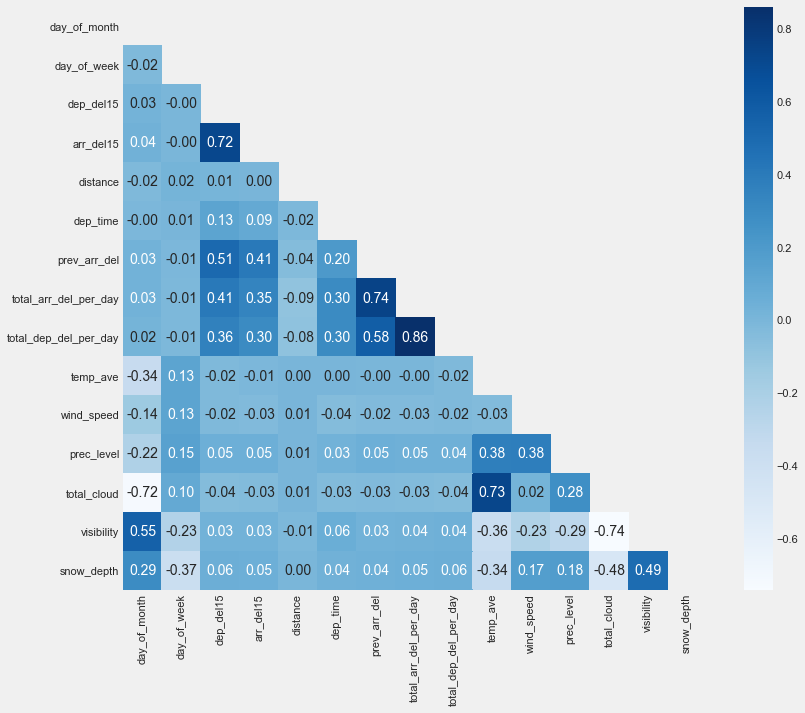

In [46]:
corr_matrix=dl.drop(['time'], axis=1).corr()
matrix = np.triu(corr_matrix)
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f',square=True,mask=matrix, cmap='Blues')

In [47]:
dl=dl.drop(columns=['dep_time_blk','arr_del15', 'time'])
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day,total_dep_del_per_day,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,215NV,PGD,RFD,0.0,1127.0,8,0,0.0,0.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
1,1,2,215NV,RFD,PGD,1.0,1127.0,10,1,1.0,0.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
2,1,2,216NV,PIE,TOL,0.0,945.0,8,0,0.0,0.0,3.4,WSW,7.4,3.0,6.3,12.9,26.3
3,1,2,216NV,TOL,PIE,0.0,945.0,11,0,0.0,0.0,3.9,WSW,7.3,3.0,6.4,13.0,26.3
4,1,2,216NV,PIE,GRR,0.0,1044.0,14,0,0.0,0.0,2.8,NW,4.2,12.5,5.5,13.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,N998NN,JFK,CLT,0.0,541.0,17,0,0.0,0.0,-5.2,WSW,4.3,0.6,3.0,14.6,20.3
565959,31,4,N998NN,CLT,RIC,0.0,257.0,20,0,0.0,0.0,-4.6,WSW,3.4,0.7,3.0,14.7,21.5
565960,31,4,N999DN,PVD,ATL,0.0,903.0,6,0,0.0,0.0,-4.8,W,5.2,0.6,3.1,14.5,19.6
565961,31,4,N999DN,ATL,STL,0.0,484.0,10,0,0.0,0.0,-4.9,W,5.1,0.6,3.1,14.5,19.6


### Label Encoding

In [48]:
from sklearn import preprocessing 
  
le = preprocessing.LabelEncoder() 
dl['tail_num']= le.fit_transform(dl['tail_num'].astype(str)) 
dl['origin'] = le.fit_transform(dl['origin'].astype(str))
dl['dest'] = le.fit_transform(dl['dest'].astype(str))
dl['wind_dir'] = le.fit_transform(dl['wind_dir'].astype(str))
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day,total_dep_del_per_day,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,0,248,274,0.0,1127.0,8,0,0.0,0.0,3.4,14,7.4,3.0,6.3,12.9,26.3
1,1,2,0,274,248,1.0,1127.0,10,1,1.0,0.0,3.9,14,7.3,3.0,6.4,13.0,26.3
2,1,2,1,254,326,0.0,945.0,8,0,0.0,0.0,3.4,14,7.4,3.0,6.3,12.9,26.3
3,1,2,1,326,254,0.0,945.0,11,0,0.0,0.0,3.9,14,7.3,3.0,6.4,13.0,26.3
4,1,2,1,254,133,0.0,1044.0,14,0,0.0,0.0,2.8,6,4.2,12.5,5.5,13.3,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,5438,170,68,0.0,541.0,17,0,0.0,0.0,-5.2,14,4.3,0.6,3.0,14.6,20.3
565959,31,4,5438,68,276,0.0,257.0,20,0,0.0,0.0,-4.6,14,3.4,0.7,3.0,14.7,21.5
565960,31,4,5439,267,19,0.0,903.0,6,0,0.0,0.0,-4.8,12,5.2,0.6,3.1,14.5,19.6
565961,31,4,5439,19,316,0.0,484.0,10,0,0.0,0.0,-4.9,12,5.1,0.6,3.1,14.5,19.6


### OUTLIERS

#### Fiture Distance

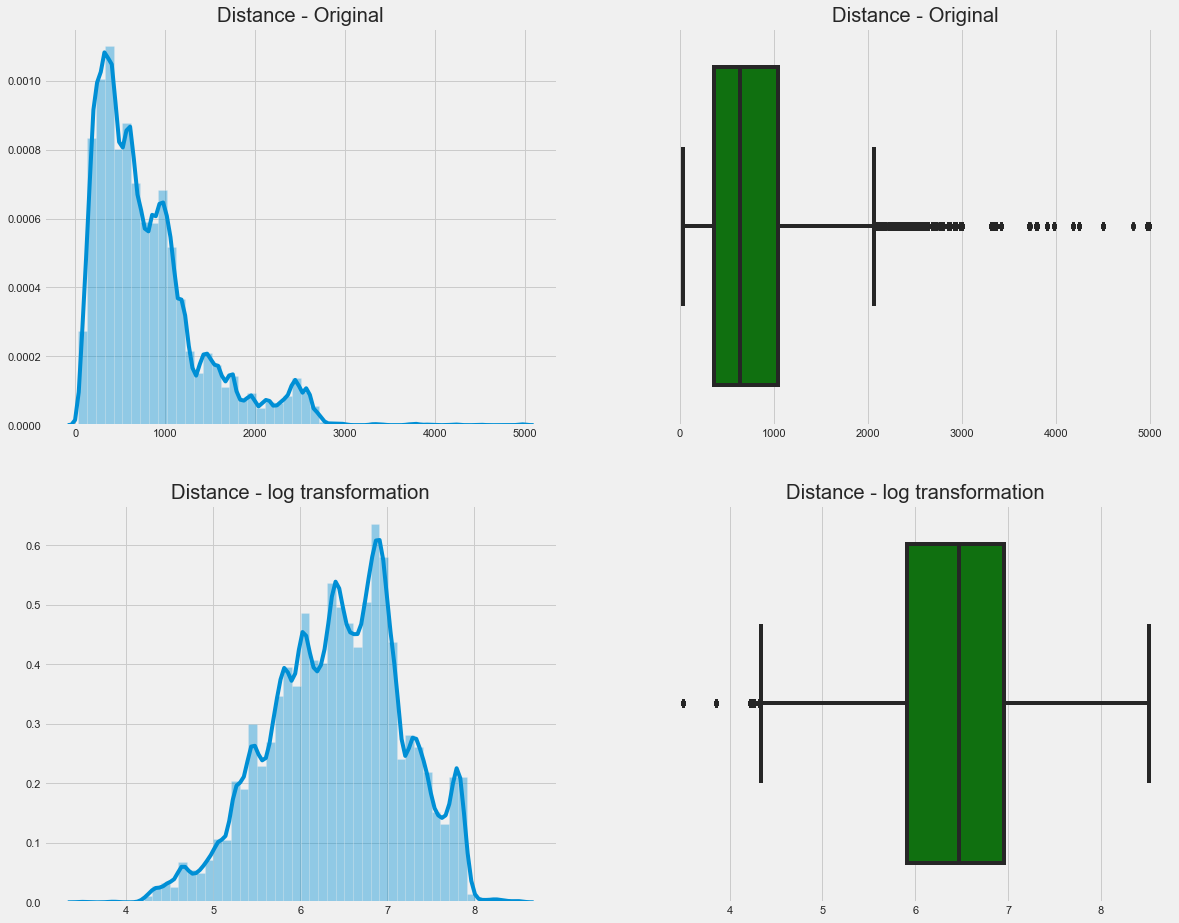

In [49]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(dl['distance'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Distance - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(dl['distance'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Distance - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(dl['distance']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Distance - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(dl['distance']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Distance - log transformation')
ax[1,1].set_xlabel('')

plt.savefig('D:/Data Science/Distance log transformation.png')

In [50]:
dl['distance'] = np.log1p(dl['distance']+1)

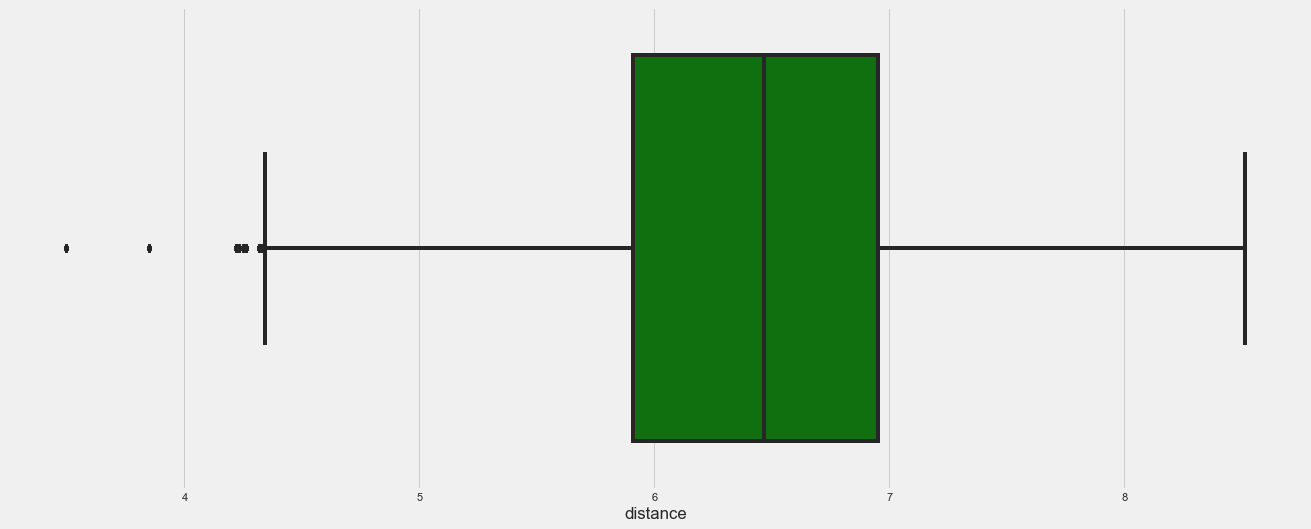

In [51]:
sns.boxplot(dl['distance'],color='green',orient='h')

#### Fiture Temperature Average

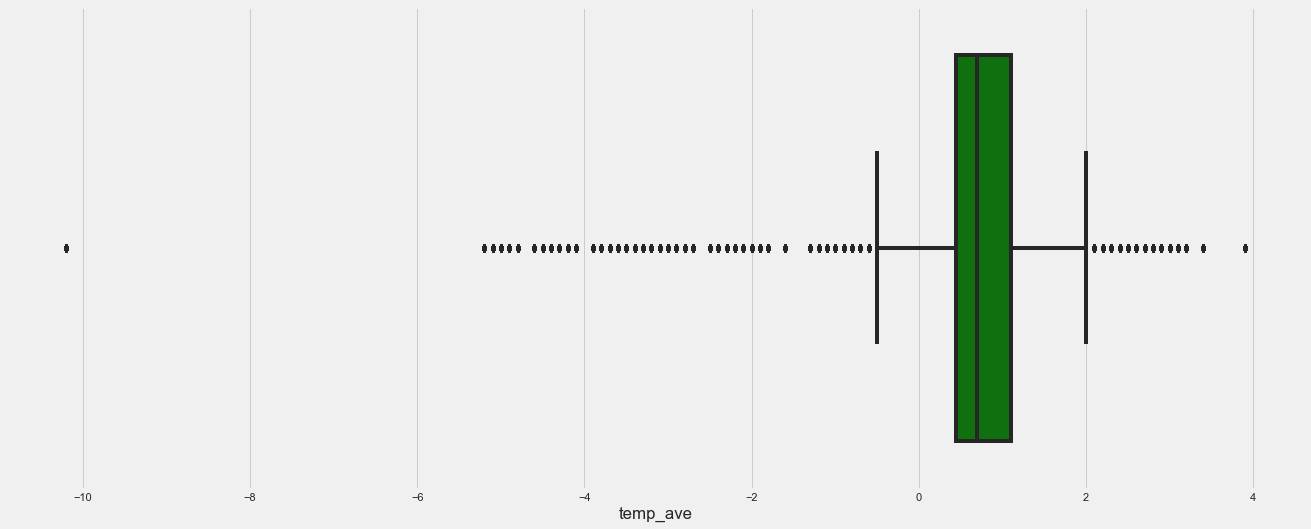

In [52]:
sns.boxplot(dl['temp_ave'],color='green', orient='h')

#### Fiture Wind Speed

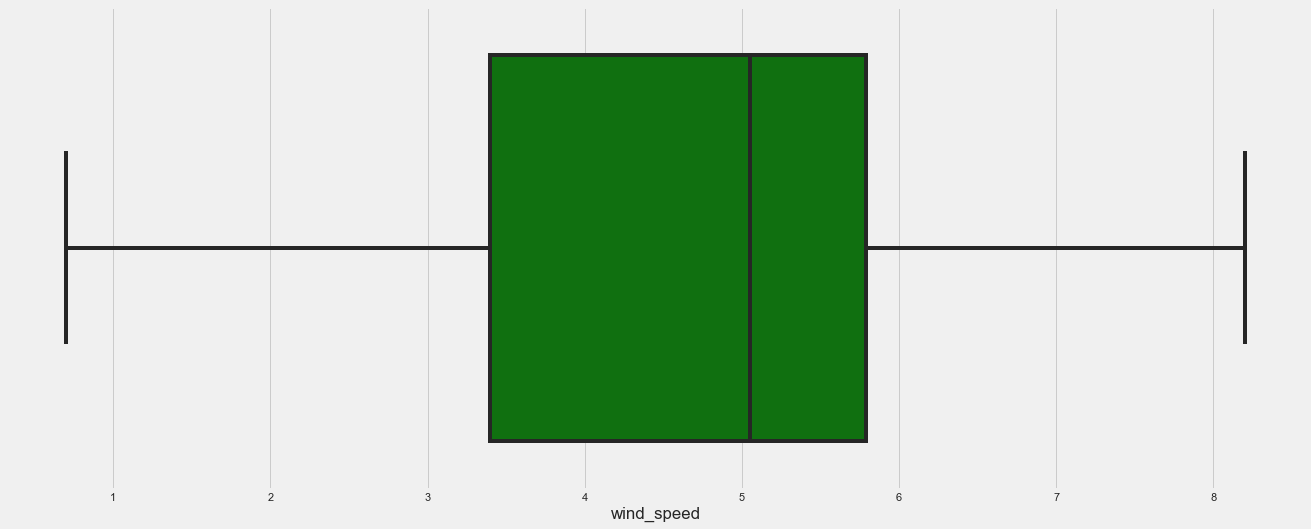

In [53]:
sns.boxplot(dl['wind_speed'],color='green',orient='h')

#### Fiture Precipitation Level

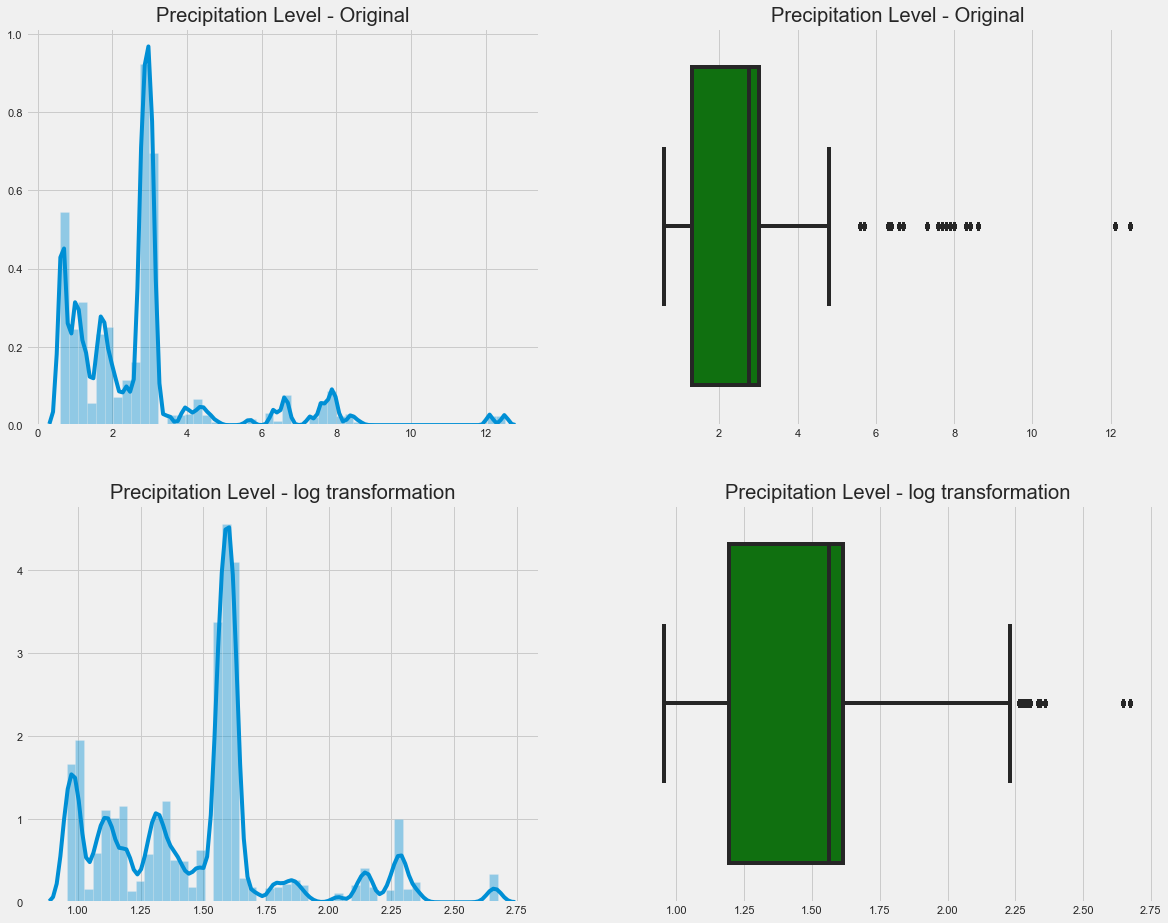

In [54]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(dl['prec_level'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Precipitation Level - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(dl['prec_level'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Precipitation Level - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(dl['prec_level']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Precipitation Level - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(dl['prec_level']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Precipitation Level - log transformation')
ax[1,1].set_xlabel('')

plt.savefig('D:/Data Science/Precipitation Level log transformation.png')

In [55]:
dl['prec_level'] = np.log1p(dl['prec_level']+1)

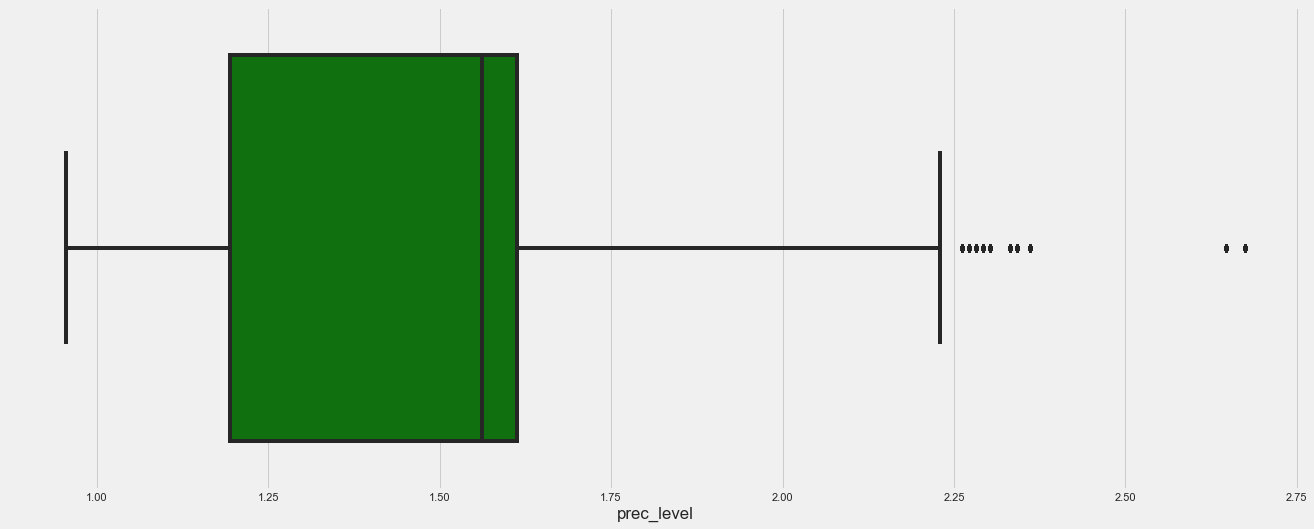

In [56]:
sns.boxplot(dl['prec_level'],color='green', orient='h')

#### Fiture Total Cloud

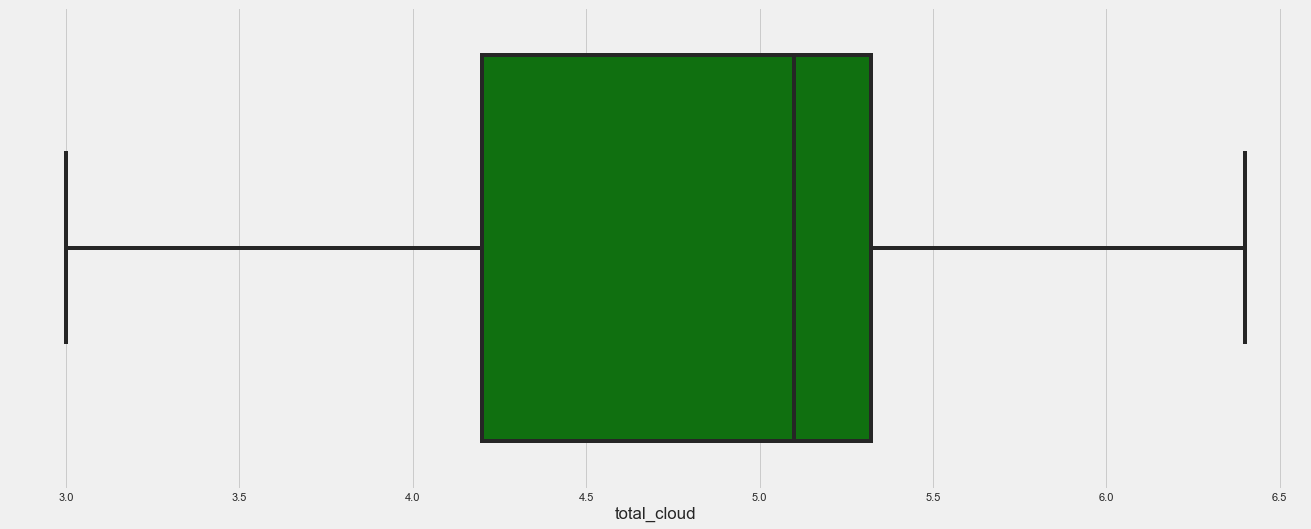

In [57]:
sns.boxplot(dl['total_cloud'],color='green',orient='h')

#### Fiture Visibility

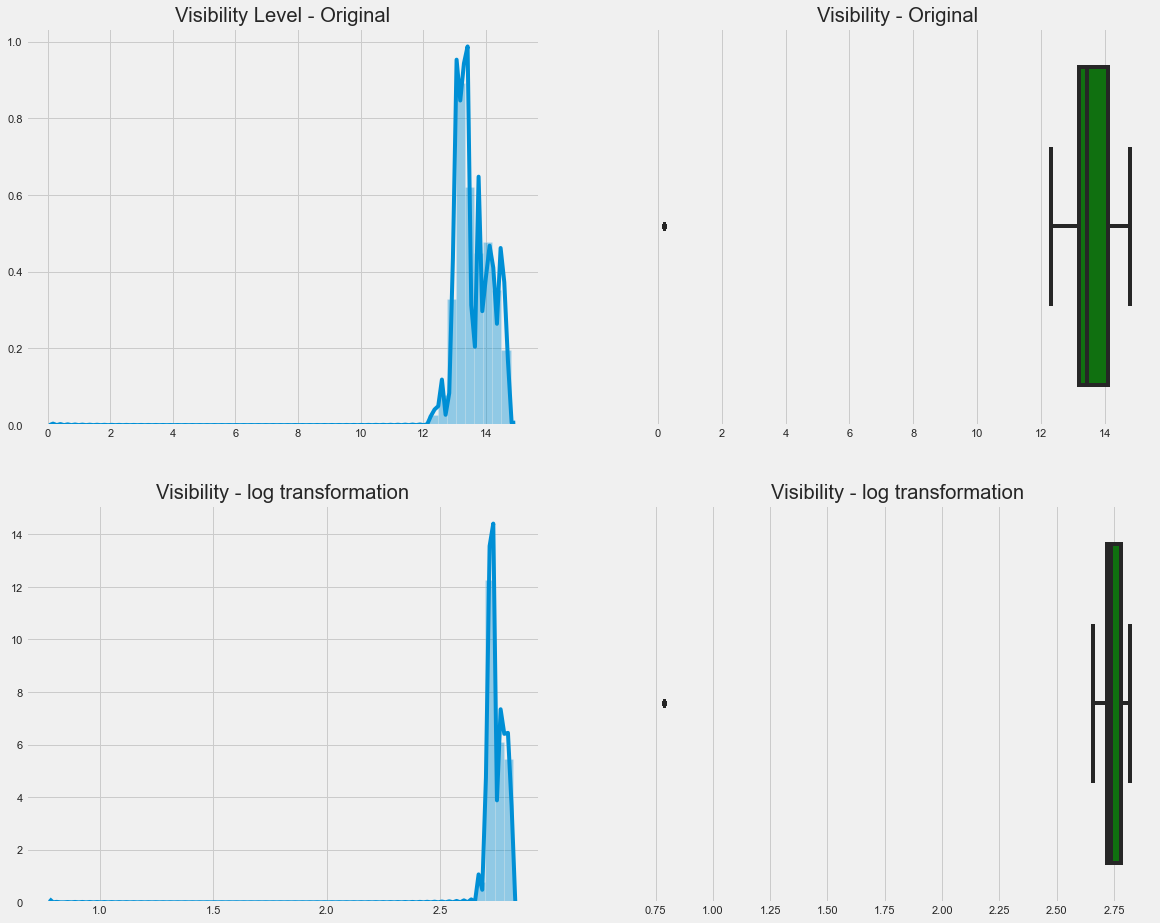

In [58]:
f,ax = plt.subplots(2,2,figsize=(18,15))

g = sns.distplot(dl['visibility'],kde=True, ax=ax[0,0])
ax[0,0].set_title('Visibility Level - Original')
ax[0,0].set_xlabel('')

g = sns.boxplot(dl['visibility'],color='green',orient='h', ax=ax[0,1])
ax[0,1].set_title('Visibility - Original')
ax[0,1].set_xlabel('')

g = sns.distplot(np.log1p(dl['visibility']+1),kde=True, ax=ax[1,0])
ax[1,0].set_title('Visibility - log transformation')
ax[1,0].set_xlabel('')

g = sns.boxplot(np.log1p(dl['visibility']+1),color='green',orient='h', ax=ax[1,1])
ax[1,1].set_title('Visibility - log transformation')
ax[1,1].set_xlabel('')

plt.savefig('D:/Data Science/Visibility log transformation.png')

In [59]:
dl['visibility'] = np.log1p(dl['visibility']+1)

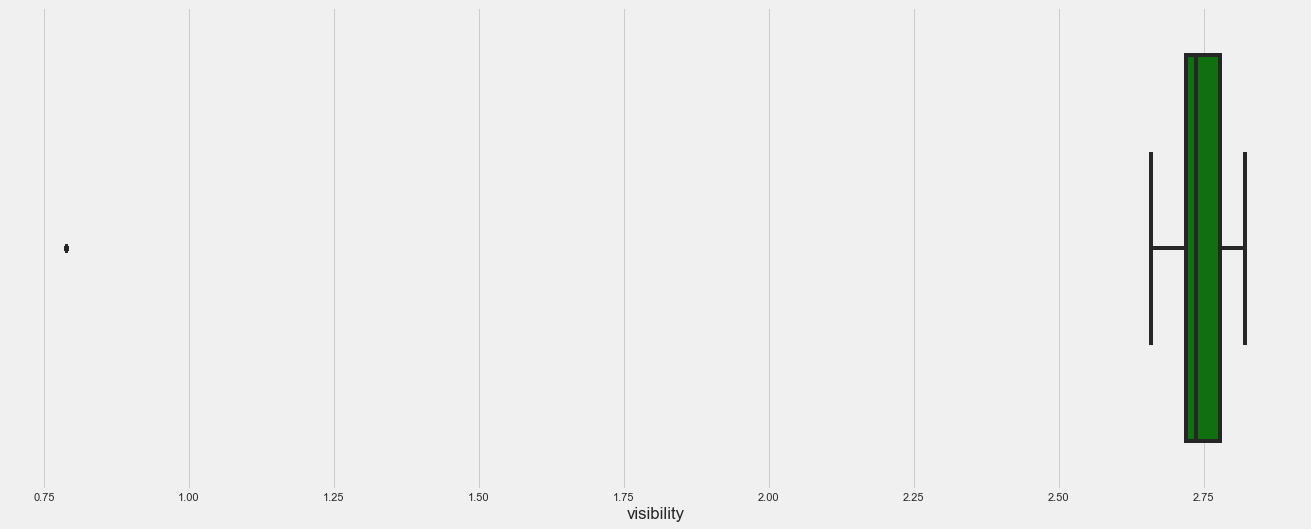

In [60]:
sns.boxplot(dl['visibility'],color='green', orient='h')

#### Fiture Snow Depth

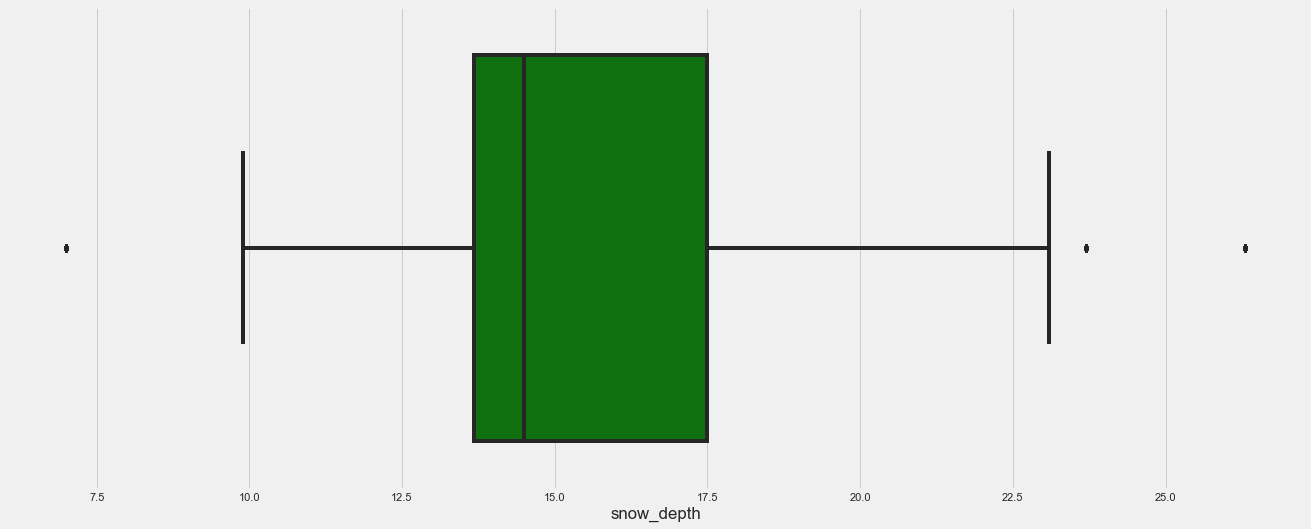

In [61]:
sns.boxplot(dl['snow_depth'],color='green',orient='h')

In [62]:
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day,total_dep_del_per_day,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,0,248,274,0.0,7.029088,8,0,0.0,0.0,3.4,14,7.4,1.609438,6.3,2.701361,26.3
1,1,2,0,274,248,1.0,7.029088,10,1,1.0,0.0,3.9,14,7.3,1.609438,6.4,2.708050,26.3
2,1,2,1,254,326,0.0,6.853299,8,0,0.0,0.0,3.4,14,7.4,1.609438,6.3,2.701361,26.3
3,1,2,1,326,254,0.0,6.853299,11,0,0.0,0.0,3.9,14,7.3,1.609438,6.4,2.708050,26.3
4,1,2,1,254,133,0.0,6.952729,14,0,0.0,0.0,2.8,6,4.2,2.674149,5.5,2.727853,23.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,5438,170,68,0.0,6.297109,17,0,0.0,0.0,-5.2,14,4.3,0.955511,3.0,2.809403,20.3
565959,31,4,5438,68,276,0.0,5.556828,20,0,0.0,0.0,-4.6,14,3.4,0.993252,3.0,2.815409,21.5
565960,31,4,5439,267,19,0.0,6.807935,6,0,0.0,0.0,-4.8,12,5.2,0.955511,3.1,2.803360,19.6
565961,31,4,5439,19,316,0.0,6.186209,10,0,0.0,0.0,-4.9,12,5.1,0.955511,3.1,2.803360,19.6


### STANDARDIZATION

In [63]:
from sklearn.preprocessing import StandardScaler

dl['distance'] = StandardScaler().fit_transform(dl['distance'].values.reshape(len(dl), 1))
dl['temp_ave'] = StandardScaler().fit_transform(dl['temp_ave'].values.reshape(len(dl), 1))
dl['wind_speed'] = StandardScaler().fit_transform(dl['wind_speed'].values.reshape(len(dl), 1))
dl['prec_level'] = StandardScaler().fit_transform(dl['prec_level'].values.reshape(len(dl), 1))
dl['total_cloud'] = StandardScaler().fit_transform(dl['total_cloud'].values.reshape(len(dl), 1))
dl['visibility'] = StandardScaler().fit_transform(dl['visibility'].values.reshape(len(dl), 1))
dl['snow_depth'] = StandardScaler().fit_transform(dl['snow_depth'].values.reshape(len(dl), 1))

In [64]:
dl

,day_of_month,day_of_week,tail_num,origin,dest,dep_del15,distance,dep_time,prev_arr_del,total_arr_del_per_day,total_dep_del_per_day,temp_ave,wind_dir,wind_speed,prec_level,total_cloud,visibility,snow_depth
0,1,2,0,248,274,0.0,0.799400,8,0,0.0,0.0,1.708750,14,1.660474,0.343669,2.001500,-0.679329,3.622929
1,1,2,0,274,248,1.0,0.799400,10,1,1.0,0.0,2.001895,14,1.599998,0.343669,2.139624,-0.577510,3.622929
2,1,2,1,254,326,0.0,0.565948,8,0,0.0,0.0,1.708750,14,1.660474,0.343669,2.001500,-0.679329,3.622929
3,1,2,1,326,254,0.0,0.565948,11,0,0.0,0.0,2.001895,14,1.599998,0.343669,2.139624,-0.577510,3.622929
4,1,2,1,254,133,0.0,0.697994,14,0,0.0,0.0,1.356977,6,-0.274772,3.315037,0.896505,-0.276076,2.761715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565958,31,4,5438,170,68,0.0,-0.172688,17,0,0.0,0.0,-3.333329,14,-0.214295,-1.481292,-2.556605,0.965271,1.635512
565959,31,4,5438,68,276,0.0,-1.155804,20,0,0.0,0.0,-2.981556,14,-0.758583,-1.375968,-2.556605,1.056694,2.032995
565960,31,4,5439,267,19,0.0,0.505703,6,0,0.0,0.0,-3.098814,12,0.329992,-1.481292,-2.418481,0.873295,1.403646
565961,31,4,5439,19,316,0.0,-0.319968,10,0,0.0,0.0,-3.157442,12,0.269516,-1.481292,-2.418481,0.873295,1.403646


## Split Train Test Data

In [65]:
# Split Feature Vector and Label
X = dl.drop(['dep_del15'],axis=1)
y = dl['dep_del15'] 

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 42)

### CLASS IMBALANCE

In [66]:
from imblearn import under_sampling, over_sampling

x = X_train
y = y_train

# Undersampling
x_under, y_under = under_sampling.RandomUnderSampler().fit_resample(x, y)

#Oversampling
# x_over, y_over = over_sampling.RandomOverSampler().fit_resample(x, y)

In [67]:
print(pd.Series(y).value_counts())

0.0    327354
1.0     68820
Name: dep_del15, dtype: int64


In [68]:
print(pd.Series(y_under).value_counts())

1.0    68820
0.0    68820
Name: dep_del15, dtype: int64


# Modeling

## Logistic Regression

### Fit

In [69]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_under, y_under)

LogisticRegression(random_state=42)

### Predict

In [70]:
# Predict the test data
y_pred = logreg.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

### Evaluation

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('\nf1 score')
print(f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nroc score')
print(roc_auc_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred)) # generate the precision, recall, f-1 score, num


confustion matrix
[[120177  20127]
 [ 12532  16953]]

accuracy
0.807649494372427

f1 score
0.5093667843461278

roc score
0.715758767831118

classification report
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88    140304
         1.0       0.46      0.57      0.51     29485

    accuracy                           0.81    169789
   macro avg       0.68      0.72      0.69    169789
weighted avg       0.83      0.81      0.82    169789



### Tune Hyperparameter with RandomSearch

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#List Hyperparameters yang akan diuji
penalty = ['l1','l2','elasticnet']
C = [0.0001, 0.001, 0.01, 0.1] # Inverse of regularization strength; smaller values specify stronger regularization.
solver = ['newton-cg', 'lbfgs', 'liblinear']


#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C, solver=solver)

# Init Logres dengan Gridsearch, cross validation = 5
logreg = LogisticRegression(random_state=42)
clf = RandomizedSearchCV(logreg, hyperparameters, cv=5, random_state=0)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best solver:', best_model.best_estimator_.get_params()['solver'])

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_pred))
print('\naccuracy')
print(accuracy_score(y_test, y_pred))
print('\nf1 score')
print(f1_score(y_test, y_pred))
print('\nroc score')
print(roc_auc_score(y_test, y_pred))
print('\nclassification report')
print(classification_report(y_test, y_pred))

Best Penalty: l2
Best C: 0.1
Best solver: newton-cg

confustion matrix
[[133675   6629]
 [ 15020  14465]]

accuracy
0.8724946845790952

f1 score
0.5719765119911426

roc score
0.7216705145819364

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.95      0.93    140304
         1.0       0.69      0.49      0.57     29485

    accuracy                           0.87    169789
   macro avg       0.79      0.72      0.75    169789
weighted avg       0.86      0.87      0.86    169789



#### Predict Proba
Digunakan ketika kita mau melihat hasil klasifikasi dengan output probabilitas dari masing-masing class

In [73]:
'''
The output of a Logistic regression model is a probability. 
We can select a threshold value. 
If the probability is greater than this threshold value, 
the event is predicted to happen otherwise it is predicted not to happen.

To get the probability of the label, repectively for class 0 and 1
'''
logreg = LogisticRegression(random_state=42)
logreg.fit(x_under, y_under)

y_predicted_proba = logreg.predict_proba(X_test)
y_predicted_proba

array([[0.65948187, 0.34051813],
       [0.62847642, 0.37152358],
       [0.73898655, 0.26101345],
       ...,
       [0.70430811, 0.29569189],
       [0.75518978, 0.24481022],
       [0.79674394, 0.20325606]])

### Choose the best threshold?
<b>How to pick best threshold?</b> Use AUC

In [74]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), np.array(y_predicted_proba[:,1]), pos_label=1) # pos_label: The label of the positive class. ada 2, 0 dan 1

In [75]:
metrics.auc(fpr, tpr)

0.749327462934092

In [76]:
pd.DataFrame({'thresholds':thresholds,'tpr':tpr,'fpr':fpr})

,thresholds,tpr,fpr
0,1.999883,0.000000,0.000000
1,0.999883,0.000034,0.000000
2,0.999839,0.000203,0.000000
3,0.999829,0.000203,0.000007
4,0.999776,0.000373,0.000007
...,...,...,...
38359,0.141284,0.999932,0.999986
38360,0.139950,0.999966,0.999986
38361,0.139901,0.999966,0.999993
38362,0.138234,1.000000,0.999993


Text(0, 0.5, 'TPR')

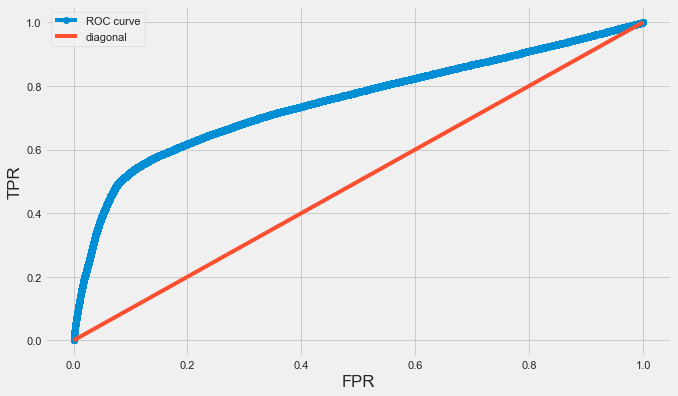

In [77]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
# for x, y, txt in zip(fpr, tpr, thresholds):
#     plt.annotate(np.round(txt,2),(x, y-0.04), fontsize=9)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

In [78]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=42)
result = model_selection.cross_val_score(logreg, x, y, cv=kfold)

In [79]:
result

array([0.84454036, 0.84731688, 0.8497905 , 0.83522641, 0.84516748,
       0.84736351, 0.84279476, 0.84168413, 0.84683343, 0.84635384])

In [80]:
print(result.mean())
print(result.std())

0.844707128570694
0.00387117561925782


## KNN

#### FIT N PREDICT

In [117]:
scaler = StandardScaler()
scaler.fit_transform(x_under)
scaler.transform(X_test)

array([[-0.76839423, -0.43493982, -0.66017262, ...,  0.68624994,
        -0.44007654, -0.55496432],
       [-0.98901233, -1.48241175, -0.57179968, ...,  0.56305398,
        -0.34705552, -0.46687724],
       [-1.09932138,  1.66000406,  0.41874027, ...,  0.51786216,
        -0.31307102, -0.43456437],
       ...,
       [ 0.11407818,  0.08879615,  0.38758721, ...,  0.22978814,
         0.10226599, -1.29920522],
       [ 0.22438724,  0.61253212,  1.45505612, ...,  1.59100173,
        -1.35785499, -1.78584993],
       [ 0.33469629,  1.13626809,  0.23372928, ...,  1.45488037,
        -1.24891525, -1.68852099]])

In [118]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_under, y_under)

KNeighborsClassifier()

In [119]:
y_pred = knn.predict(X_test)
y_pred

array([1., 0., 1., ..., 1., 1., 0.])

#### EVALUATION

In [120]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('\nf1 score')
print(f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nroc score')
print(roc_auc_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_pred))


confustion matrix
[[77133 63171]
 [13021 16464]]

accuracy
0.5512547927133089

f1 score
0.30175953079178885

roc score
0.5540709316960195

classification report
              precision    recall  f1-score   support

         0.0       0.86      0.55      0.67    140304
         1.0       0.21      0.56      0.30     29485

    accuracy                           0.55    169789
   macro avg       0.53      0.55      0.49    169789
weighted avg       0.74      0.55      0.61    169789



#### Diatas K nya default = 5

### K VS F1 Score

In [125]:
from sklearn import neighbors 
from sklearn.metrics import f1_score,confusion_matrix
f1_list=[]
k_list=[]
for k in range(1,10):
    clf=neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_under,y_under)
    pred=clf.predict(X_test)
    f=f1_score(y_test,pred)
   
    f1_list.append(f)
    k_list.append(k)


score_f1 = dict(zip(k_list, f1_list))
score_f1

{1: 0.29824849779920737,
 2: 0.2616984402079723,
 3: 0.3009996162350834,
 4: 0.2808883173409833,
 5: 0.30175953079178885,
 6: 0.28501869605227903,
 7: 0.2998747245311314,
 8: 0.2861664160175978,
 9: 0.2990341039139391}

In [126]:
best_f1_score=max(f1_list)
best_k=k_list[f1_list.index(best_f1_score)]        
print("Best K value=",best_k," with F1-Score=",best_f1_score)

Best K value= 5  with F1-Score= 0.30175953079178885


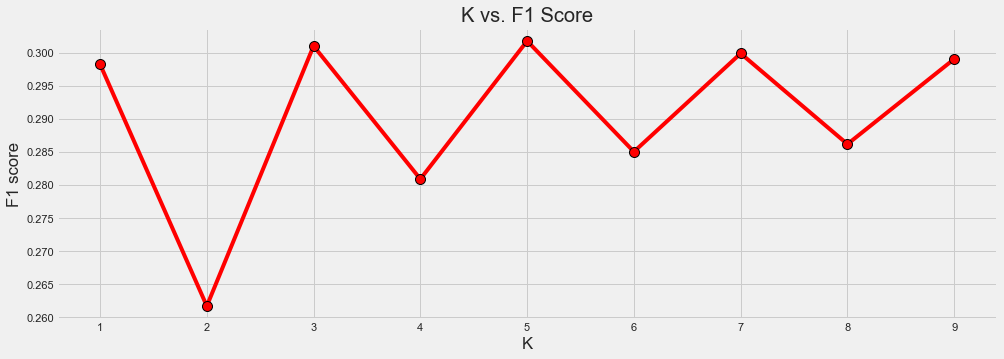

In [127]:
plt.figure(figsize=(15,5))

y = f1_list
x = k_list
plt.plot(x, y, color='red', marker='o',markeredgecolor='black', markersize=10)
plt.xlabel("K")
plt.ylabel("F1 score")
plt.title("K vs. F1 Score")
plt.show()

### Tune Hyperparameter with RandomSearch


In [128]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

#List Hyperparameters yang akan diuji
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init Logres dengan Gridsearch, cross validation = 5
knn2 = KNeighborsClassifier()
clf = RandomizedSearchCV(knn2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(x_under, y_under)



#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_pred))
print('\naccuracy')
print(accuracy_score(y_test, y_pred))
print('\nf1 score')
print(f1_score(y_test, y_pred))
print('\nroc score')
print(roc_auc_score(y_test, y_pred))
print('\nclassification report')
print(classification_report(y_test, y_pred))

#Nilai hyperparameters terbaik
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best algorithm:', best_model.best_estimator_.get_params()['algorithm'])


confustion matrix
[[97684 42620]
 [14998 14487]]

accuracy
0.660649394248155

f1 score
0.33460365853658536

roc score
0.5937828090356302

classification report
              precision    recall  f1-score   support

         0.0       0.87      0.70      0.77    140304
         1.0       0.25      0.49      0.33     29485

    accuracy                           0.66    169789
   macro avg       0.56      0.59      0.55    169789
weighted avg       0.76      0.66      0.70    169789

Best n_neighbors: 20
Best p: 1
Best algorithm: kd_tree


In [129]:
from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=42)
knn2.fit(x_under, y_under)

y_predicted_proba = knn2.predict_proba(X_test)
y_predicted_proba

array([[0.4047619 , 0.5952381 ],
       [0.42857143, 0.57142857],
       [0.33333333, 0.66666667],
       ...,
       [0.42857143, 0.57142857],
       [0.38095238, 0.61904762],
       [0.5       , 0.5       ]])

In [130]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), np.array(y_predicted_proba[:,1]), pos_label=1)

In [131]:
metrics.auc(fpr, tpr)

0.5649494371513506

In [132]:
pd.DataFrame({'thresholds':thresholds,'tpr':tpr,'fpr':fpr})

,thresholds,tpr,fpr
0,1.928571,0.000000,0.000000
1,0.928571,0.000034,0.000000
2,0.904762,0.000068,0.000007
3,0.880952,0.000136,0.000014
4,0.857143,0.000203,0.000064
5,0.833333,0.000610,0.000207
6,0.809524,0.001017,0.000570
7,0.785714,0.002713,0.001390
8,0.761905,0.006105,0.003029
9,0.738095,0.013091,0.006422


Text(0, 0.5, 'TPR')

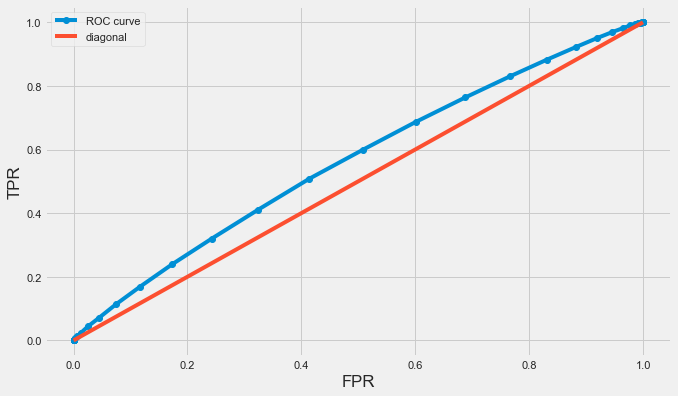

In [133]:
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
# for x, y, txt in zip(fpr, tpr, thresholds):
#     plt.annotate(np.round(txt,2),(x, y-0.04), fontsize=9)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")

###  

### Coba RF tanpa tuning

In [112]:
from sklearn.ensemble import RandomForestClassifier
Random_forest = RandomForestClassifier(n_estimators=50)
Random_forest.fit(x_under,y_under)
randomForest_predict = Random_forest.predict(X_test)
randomForest_score = metrics.accuracy_score(y_test, randomForest_predict)
print("Accuracy :",randomForest_score)
from sklearn.metrics import f1_score
print('\nf1 score')
print(f1_score(y_test, randomForest_predict))

Accuracy : 0.7984086130432478

f1 score
0.5277724124610247


### 

## Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_under,y_under)
y_predicted = dt.predict(X_test)

### Evaluation

In [99]:
from sklearn.metrics import classification_report, confusion_matrix
print('\nconfustion matrix') # generate the confusion matrix
print(confusion_matrix(y_test, y_predicted))

from sklearn.metrics import accuracy_score
print('\naccuracy')
print(accuracy_score(y_test, y_pred))

from sklearn.metrics import f1_score
print('\nf1 score')
print(f1_score(y_test, y_pred))

from sklearn.metrics import roc_auc_score
print('\nroc score')
print(roc_auc_score(y_test, y_pred))

from sklearn.metrics import classification_report
print('\nclassification report')
print(classification_report(y_test, y_predicted)) # generate the precision, recall, f-1 score, num


confustion matrix
[[93172 47132]
 [ 9781 19704]]

accuracy
0.8272326240215797

f1 score
0.018207376665104757

roc score
0.5041813083150746

classification report
              precision    recall  f1-score   support

         0.0       0.90      0.66      0.77    140304
         1.0       0.29      0.67      0.41     29485

    accuracy                           0.66    169789
   macro avg       0.60      0.67      0.59    169789
weighted avg       0.80      0.66      0.70    169789



### Tune Hyperparameter with RandomSearch

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93    140304
         1.0       0.71      0.45      0.55     29485

    accuracy                           0.87    169789
   macro avg       0.80      0.70      0.74    169789
weighted avg       0.86      0.87      0.86    169789



#### Menambahkan hyperparameter `criterion` dan `splitter` pada Decision Tree
reference: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# list of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini', 'entropy']
splitter = ['best','random']

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'max_features': max_features,
                'criterion':criterion,
                'splitter':splitter
                }

# Init Logres dengan Gridsearch, cross validation = 5
dt2 = DecisionTreeClassifier(random_state=42)
clf = RandomizedSearchCV(dt2, hyperparameters, cv=5, random_state=42)

#Fitting Model
best_model = clf.fit(X_train, y_train)

#Prediksi menggunakan model baru
y_pred = best_model.predict(X_test)#Check performa dari model
print(classification_report(y_test, y_pred))
# roc_auc_score(y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.92    140304
         1.0       0.71      0.44      0.54     29485

    accuracy                           0.87    169789
   macro avg       0.80      0.70      0.73    169789
weighted avg       0.86      0.87      0.86    169789



### Interpretation
Left == TRUE, Right == FALSE

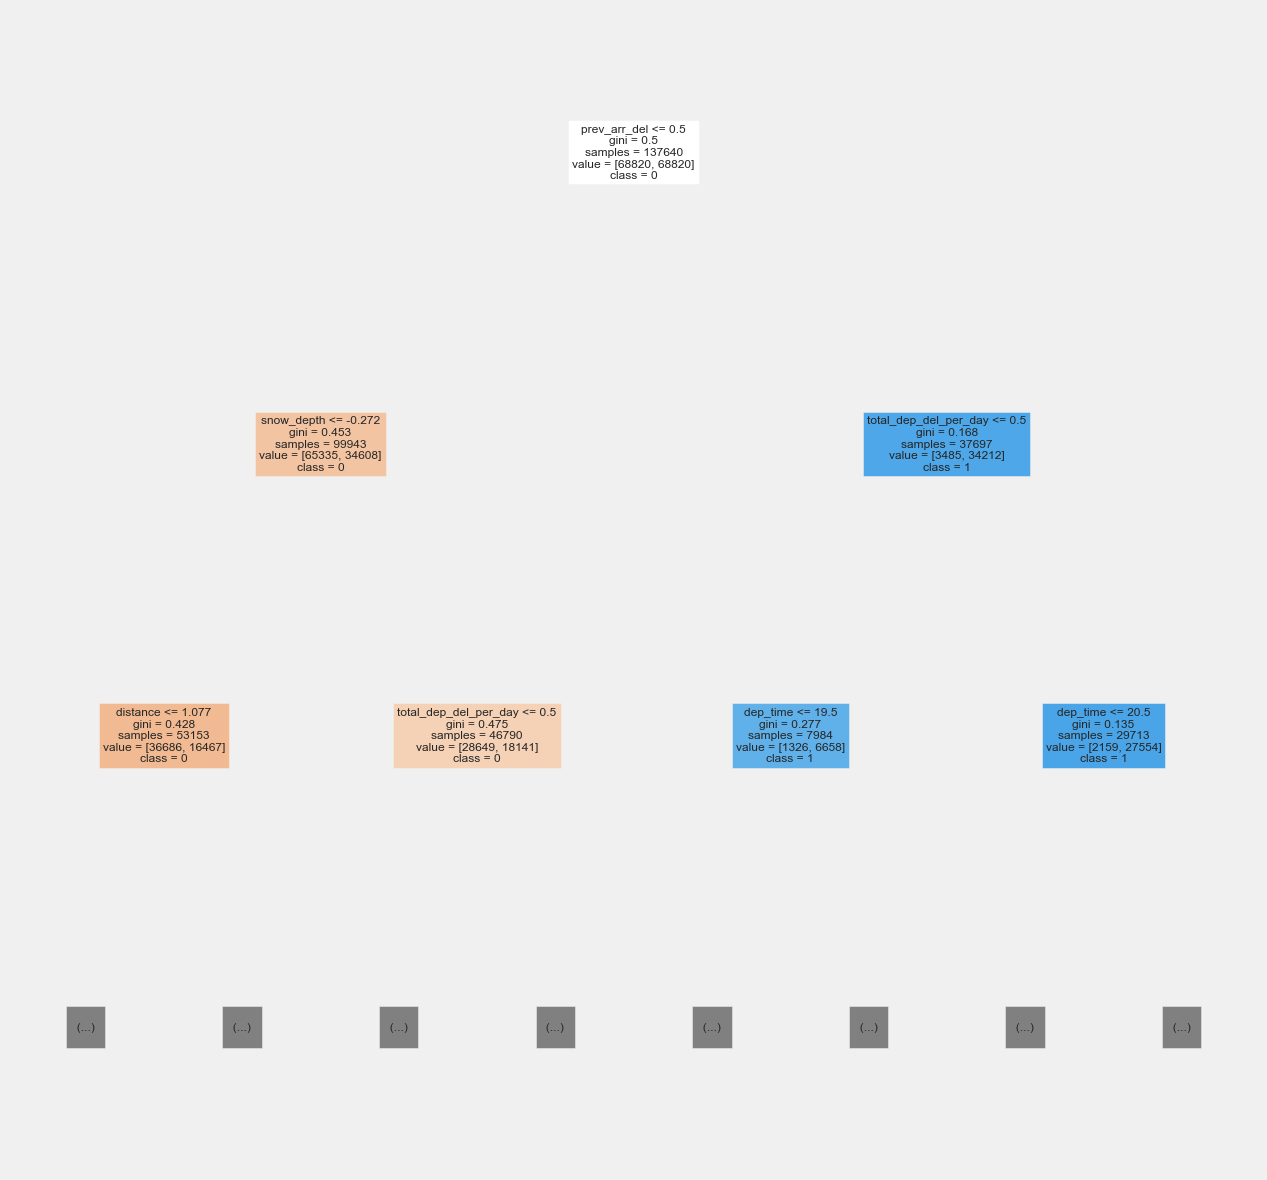

In [102]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(dt,
               feature_names = X.columns.tolist(), 
               class_names=['0','1'],
               filled = True, max_depth=2, fontsize=12)
plt.show()

In [103]:
#df_set=df[['DAY_OF_MONTH','DAY_OF_WEEK','TAIL_NUM','ORIGIN','DEST','DEP_DEL15','DEP_TIME_BLK','ARR_DEL15','DISTANCE']]
#df_set.columns=df_set.columns.str.lower()

In [104]:
# Split Feature Vector and Label
X = dl[['day_of_month','day_of_week', 'tail_num','origin', 
        'dest','distance','dep_time','prev_arr_del','total_arr_del_per_day','total_dep_del_per_day',
        'temp_ave','wind_dir','wind_speed','prec_level','total_cloud','visibility','snow_depth']]

In [105]:
# get importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01024
Feature: 1, Score: 0.00991
Feature: 2, Score: 0.14438
Feature: 3, Score: 0.09376
Feature: 4, Score: 0.10102
Feature: 5, Score: 0.12028
Feature: 6, Score: 0.06469
Feature: 7, Score: 0.25060
Feature: 8, Score: 0.00718
Feature: 9, Score: 0.00926
Feature: 10, Score: 0.04185
Feature: 11, Score: 0.00815
Feature: 12, Score: 0.03277
Feature: 13, Score: 0.02785
Feature: 14, Score: 0.02211
Feature: 15, Score: 0.02492
Feature: 16, Score: 0.03102


Text(0.5, 1.0, 'feature importance score')

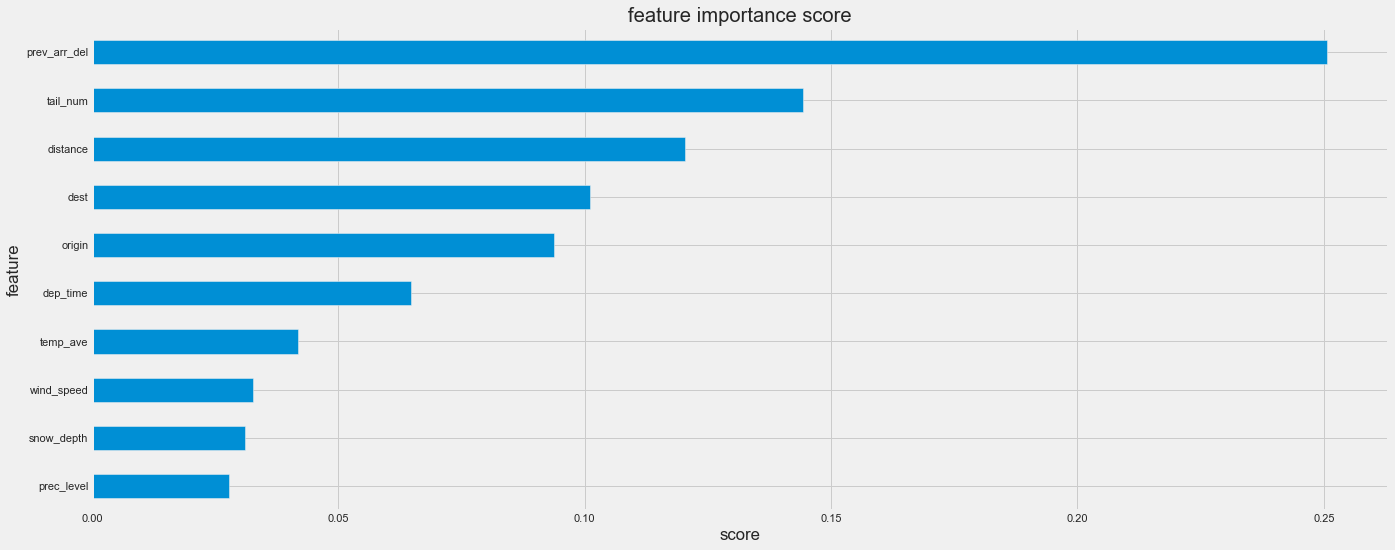

In [106]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(10).plot(kind='barh')
ax.invert_yaxis()
plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

###  

In [134]:
models = [logreg, knn, Random_forest, dt]
score = []
for model in models:
    preds_test = model.predict(X_test)
    f1 = f1_score(y_test, preds_test)
    score.append(f1)

In [135]:
score

[0.5093667843461278,
 0.30175953079178885,
 0.5277724124610247,
 0.40913196499205784]

In [136]:
model_name = ['Logistic Regression', 'KNN', 'RF', 'DT']
f1 = dict(zip(model_name, score))
f1

{'Logistic Regression': 0.5093667843461278,
 'KNN': 0.30175953079178885,
 'RF': 0.5277724124610247,
 'DT': 0.40913196499205784}

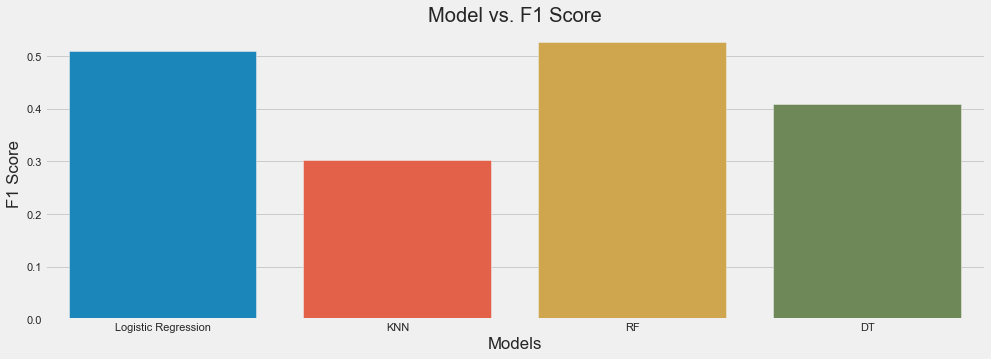

In [137]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x = list(f1.keys()), y = list(f1.values()))

plt.xlabel("Models")
plt.ylabel("F1 Score")
plt.title("Model vs. F1 Score")
plt.show()